# Delhivery Business Case Study

## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Problem Statement

Delhivery seeks to enhance its data processing by cleaning, aggregating, and analyzing raw logistics data. The data includes timestamps, route details, and distances for each trip, with each trip divided into segments across multiple rows.

The challenge is to handle missing values, outliers, and unknown fields, while aggregating data based on trip UUID and extracting useful features. Key metrics like actual time vs. predicted time (OSRM) and distance need to be compared through visual analysis and hypothesis testing.

The goal is to generate actionable business insights to improve delivery efficiency, optimize routes, and support forecasting models.

## Column Profiling:

data                           – tells whether the data is testing or training data <br>
trip_creation_time             – Timestamp of trip creation <br>
route_schedule_uuid            – Unique Id for a particular route schedule <br>
route_type                     – Transportation type <br>
FTL                            – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way. Carting: Handling system consisting of small vehicles (carts)<br>
trip_uuid                      – Unique ID given to a particular trip (A trip may include different source and destination centers) <br>
source_center                  – Source ID of trip origin <br>
source_name                    – Source Name of trip origin <br>
destination_center             – Destination ID <br>
destination_name               – Destination Name <br>
od_start_time                  – Trip start time <br>
od_end_time                    – Trip end time <br>
start_scan_to_end_scan         – Time taken to deliver from source to destination <br>
actual_distance_to_destination – Distance in Kms between source and destination warehouse <br>
actual_time                    – Actual time taken to complete the delivery (Cumulative) <br>
osrm_time                      – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)<br>
osrm_distance                  – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)<br>
segment_actual_time            – This is a segment time. Time taken by the subset of the package delivery <br>
segment_osrm_time              – This is the OSRM segment time. Time taken by the subset of the package delivery <br>
segment_osrm_distance          – This is the OSRM distance. Distance covered by subset of the package delivery <br>

<strong>Unknown Fields:</strong> is_cutoff, cutoff_factor, cutoff_timestamp, factor, segment_factor

## Data Cleaning and Exploration

### Basic Exploration

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Load the dataset
# df = pd.read_csv('delhivery_data.csv')
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')
df.sample(5)

data          trip_creation_time  \
52983   training  2018-09-16 20:26:20.631346   
47216       test  2018-09-30 21:58:16.081990   
130738  training  2018-09-18 15:21:12.692049   
24826   training  2018-09-21 18:46:29.901572   
76309       test  2018-09-30 01:00:34.183402   

                                      route_schedule_uuid route_type  \
52983   thanos::sroute:9ff9217a-3084-48e0-aab2-b340606...        FTL   
47216   thanos::sroute:4a82dc91-6e1b-4d75-8b07-dba2aec...    Carting   
130738  thanos::sroute:aa5fea4d-666c-4d4d-a4d0-6a1a7fd...    Carting   
24826   thanos::sroute:83251748-2256-453f-b94f-c1f4dec...        FTL   
76309   thanos::sroute:f01c8bbd-655d-42ea-9abf-60d5040...        FTL   

                      trip_uuid source_center  \
52983   trip-153712958063109219  IND000000ACB   
47216   trip-153834469608177129  IND532001AAB   
130738  trip-153728407269182514  IND834002AAB   
24826   trip-153755558990119114  IND524003AAA   
76309   trip-153826923418313854  IND209304AAA   

                                   source_name destination_center  \
52983            Gurgaon_Bilaspur_HB (Haryana)       IND382430AAB   
47216   Srikakulam_Kuslpram_I (Andhra Pradesh)       IND530012AAA   
130738                  Ranchi_Hub (Jharkhand)       IND827013AAA   
24826              Nellore_DC (Andhra Pradesh)       IND501359AAE   
76309       Kanpur_Central_H_6 (Uttar Pradesh)       IND000000ACB   

                                  destination_name  \
52983                 Ahmedabad_East_H_1 (Gujarat)   
47216   Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)   
130738                Bokaro_KSClny_DC (Jharkhand)   
24826             Hyderabad_Shamshbd_H (Telangana)   
76309                Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time                 od_end_time  \
52983   2018-09-16 20:26:20.631346  2018-09-17 17:41:26.150696   
47216   2018-10-01 02:23:09.803185  2018-10-01 12:25:26.051099   
130738  2018-09-18 15:21:12.692049  2018-09-19 01:00:26.166670   
24826   2018-09-22 02:23:30.636247  2018-09-22 15:14:08.570623   
76309   2018-10-01 06:10:30.659138  2018-10-02 00:27:15.361416   

        start_scan_to_end_scan  is_cutoff  cutoff_factor     cutoff_timestamp  \
52983                   1275.0       True            726  2018-09-16 22:30:32   
47216                    602.0       True             63  2018-10-01 03:50:30   
130738                   579.0      False             86  2018-09-18 16:45:22   
24826                    770.0       True            286  2018-09-22 04:35:23   
76309                   1096.0       True             44  2018-10-01 22:41:29   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
52983                       733.071962       1116.0      628.0       868.7422   
47216                        64.966349        120.0       60.0        82.1726   
130738                       86.432441        483.0       89.0       123.8080   
24826                       286.073514        549.0      301.0       397.6012   
76309                        44.221250         54.0       40.0        48.0880   

          factor  segment_actual_time  segment_osrm_time  \
52983   1.777070                 48.0               31.0   
47216   2.000000                  9.0                6.0   
130738  5.426966                 22.0                7.0   
24826   1.823920                 33.0               22.0   
76309   1.350000                 24.0               17.0   

        segment_osrm_distance  segment_factor  
52983                 29.2409        1.548387  
47216                  9.1633        1.500000  
130738                10.1016        3.142857  
24826                 32.5536        1.500000  
76309                 22.9338        1.411765

In [ ]:
row_num, col_num = df.shape
print(f'There are {row_num} rows and {col_num} columns in the dataset')

There are 144867 rows and 24 columns in the dataset


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Insights:
- As we can see, none of the columns are in datetime format. We need to convert the columns with timestamps to datetime format.
- There are object, bool, float, and integer data types in the dataset. Will convert some of the categorical columns to category data type.

In [ ]:
# Checking Duplicate Rows
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset')

There are 0 duplicate rows in the dataset


Notes:
- Before doing statistical analysis, will clean up the data. Hence, will be easier to identify the patterns and trends in the data.

### Cleaning of Data

In [ ]:
# Drop the unknown columns
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(unknown_fields, axis=1, inplace=True)
print(f'Before dropping, the dataset has {row_num} rows and {col_num} columns')
print(f'After dropping, the dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.sample(5)

Before dropping, the dataset has 144867 rows and 24 columns
After dropping, the dataset has 144867 rows and 19 columns


data          trip_creation_time  \
104748  training  2018-09-25 06:10:18.418623   
118228      test  2018-09-29 13:00:07.223764   
19608   training  2018-09-21 14:25:30.123968   
130114      test  2018-10-02 08:49:32.876219   
80713   training  2018-09-17 22:08:39.150911   

                                      route_schedule_uuid route_type  \
104748  thanos::sroute:626fde59-52ba-4d31-ace6-0641841...        FTL   
118228  thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
19608   thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
130114  thanos::sroute:c9035b9e-78e2-4ffe-831b-d8734fa...    Carting   
80713   thanos::sroute:27e9c98a-7465-43e6-ab0c-3d36b5b...        FTL   

                      trip_uuid source_center  \
104748  trip-153785581841837896  IND000000ACB   
118228  trip-153822600722350680  IND000000ACB   
19608   trip-153753993012372153  IND000000ACB   
130114  trip-153847017287596293  IND421302AAG   
80713   trip-153722211915054363  IND562132AAA   

                              source_name destination_center  \
104748      Gurgaon_Bilaspur_HB (Haryana)       IND562132AAA   
118228      Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
19608       Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
130114  Bhiwandi_Mankoli_HB (Maharashtra)       IND400102AAC   
80713    Bangalore_Nelmngla_H (Karnataka)       IND421302AAG   

                         destination_name               od_start_time  \
104748   Bangalore_Nelmngla_H (Karnataka)  2018-09-25 06:10:18.418623   
118228   Kolkata_Dankuni_HB (West Bengal)  2018-09-29 13:00:07.223764   
19608    Kolkata_Dankuni_HB (West Bengal)  2018-09-21 14:25:30.123968   
130114    Mumbai_Jogshwri_I (Maharashtra)  2018-10-02 08:49:32.876219   
80713   Bhiwandi_Mankoli_HB (Maharashtra)  2018-09-17 22:08:39.150911   

                       od_end_time  start_scan_to_end_scan  \
104748  2018-09-27 11:59:15.538978                  3228.0   
118228  2018-10-01 04:14:22.214109                  2354.0   
19608   2018-09-23 07:00:36.659298                  2435.0   
130114  2018-10-02 11:30:55.530148                   161.0   
80713   2018-09-18 22:48:48.303083                  1480.0   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
104748                       22.577731         60.0       33.0        31.3163   
118228                      815.011464       1226.0      612.0       866.7387   
19608                       704.633683       1196.0      532.0       754.5322   
130114                       22.383492         87.0       30.0        33.0044   
80713                        33.612116         78.0       30.0        40.5194   

        segment_actual_time  segment_osrm_time  segment_osrm_distance  
104748                 60.0               33.0                31.3163  
118228                 24.0               14.0                20.5391  
19608                  36.0               17.0                25.2881  
130114                 11.0                6.0                 6.2435  
80713                  78.0               30.0                40.5194

Insights:
- There are unknown columns in the dataset. We can drop these columns as they do not provide any useful information.
- Hence, 5 columns were dropped from the dataset.

In [ ]:
# Convert the timestamp columns to datetime
date_time_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for col in date_time_cols:
    df[col] = pd.to_datetime(df[col])

# Convert the categorical columns to category
cat_cols = ['data', 'route_type']
for col in cat_cols:
    df[col] = df[col].astype('category')
df.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

Insights:
- Columns are not in the correct format. We need to convert the columns to the correct format.
- Timestamp columns are converted to datetime format. Categorical columns are converted to category data type.
- This will help in retrieving the correct information from the dataset easier.

In [ ]:
# Finding missing values and their percentage
missing_values = df.isnull().sum()
missing_values
missing_values = missing_values[missing_values > 0]
missing_percentage = missing_values / df.shape[0] * 100
missing_values = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_values

Missing Values  Percentage
source_name                  293    0.202254
destination_name             261    0.180165

Insights:
- There are missing values in the dataset.
- Source and Destination Name columns have missing values. It was around .2% and 0.18% of the data respectively.
- Since the missing values are very less, we can drop the rows with missing values.

In [ ]:
# Finding whether source and destination name was mentioned in the other rows based on Destination ID
######################################################################################################

# Getting the unique source centers with missing source names
src_name_missed_centers = df.loc[df['source_name'].isna(), 'source_center'].unique()
print(f'The source centers with missing source names are: {src_name_missed_centers}')

# Identify the source name by checking if it is available for the source center in other rows
print(df.loc[df['source_center'].isin(src_name_missed_centers), 'source_name'].unique())

print('-------------------------------------------------------------------------------------------------')

# Getting the unique destination centers with missing source names
dest_name_missed_centers = df.loc[df['destination_name'].isna(), 'destination_center'].unique()
print(f'The destination centers with missing source names are: {dest_name_missed_centers}')

# Identify the source name by checking if it is available for the source center in other rows
print(df.loc[df['destination_center'].isin(dest_name_missed_centers), 'destination_name'].unique())

The source centers with missing source names are: ['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND509103AAC' 'IND126116AAA' 'IND331022A1B'
 'IND505326AAB' 'IND852118A1B']
[nan]
-------------------------------------------------------------------------------------------------
The destination centers with missing source names are: ['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND505326AAB' 'IND852118A1B' 'IND126116AAA'
 'IND509103AAC' 'IND221005A1A' 'IND250002AAC' 'IND331001A1C'
 'IND122015AAC']
[nan]


Insights:
- Source Name is not available for the source center. Hence, we can drop the rows with missing values.
- Destination Name is not available for the destination center. Hence, we can drop the rows with missing values.

In [ ]:
# Since the source and destination names are missing, we can impute them with the source and destination centers
# But, the percentage of missing values is very low, so we can drop them
print(f'Before dropping, the dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.dropna(subset=['source_name', 'destination_name'], inplace=True)
print(f'After dropping, the dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# Checking the missing values again
print(f'There are {df.isnull().sum().sum()} missing values in the dataset')

Before dropping, the dataset has 144867 rows and 19 columns
After dropping, the dataset has 144316 rows and 19 columns
There are 0 missing values in the dataset


### Statistical Analysis

In [ ]:
df.describe().T

count                           mean  \
trip_creation_time                144316  2018-09-22 13:05:09.454117120   
od_start_time                     144316  2018-09-22 17:32:42.435769344   
od_end_time                       144316  2018-09-23 09:36:54.057172224   
start_scan_to_end_scan          144316.0                     963.697698   
actual_distance_to_destination  144316.0                     234.708498   
actual_time                     144316.0                     417.996237   
osrm_time                       144316.0                     214.437055   
osrm_distance                   144316.0                     285.549785   
segment_actual_time             144316.0                      36.175379   
segment_osrm_time               144316.0                      18.495697   
segment_osrm_distance           144316.0                      22.818993   

                                                       min  \
trip_creation_time              2018-09-12 00:00:16.535741   
od_start_time                   2018-09-12 00:00:16.535741   
od_end_time                     2018-09-12 00:50:10.814399   
start_scan_to_end_scan                                20.0   
actual_distance_to_destination                    9.000045   
actual_time                                            9.0   
osrm_time                                              6.0   
osrm_distance                                       9.0082   
segment_actual_time                                 -244.0   
segment_osrm_time                                      0.0   
segment_osrm_distance                                  0.0   

                                                          25%  \
trip_creation_time              2018-09-17 02:46:11.004421120   
od_start_time                   2018-09-17 07:37:35.014584832   
od_end_time                        2018-09-18 01:29:56.978912   
start_scan_to_end_scan                                  161.0   
actual_distance_to_destination                      23.352027   
actual_time                                              51.0   
osrm_time                                                27.0   
osrm_distance                                        29.89625   
segment_actual_time                                      20.0   
segment_osrm_time                                        11.0   
segment_osrm_distance                               12.053975   

                                                          50%  \
trip_creation_time              2018-09-22 03:36:19.186585088   
od_start_time                   2018-09-22 07:35:23.038482944   
od_end_time                     2018-09-23 02:49:00.936600064   
start_scan_to_end_scan                                  451.0   
actual_distance_to_destination                      66.135322   
actual_time                                             132.0   
osrm_time                                                64.0   
osrm_distance                                         78.6244   
segment_actual_time                                      28.0   
segment_osrm_time                                        17.0   
segment_osrm_distance                                 23.5083   

                                                          75%  \
trip_creation_time              2018-09-27 17:53:19.027942912   
od_start_time                   2018-09-27 22:01:30.861209088   
od_end_time                     2018-09-28 12:13:41.675546112   
start_scan_to_end_scan                                 1645.0   
actual_distance_to_destination                     286.919294   
actual_time                                             516.0   
osrm_time                                               259.0   
osrm_distance                                        346.3054   
segment_actual_time                                      40.0   
segment_osrm_time                                        22.0   
segment_osrm_distance                               27.813325   

                                              

In [ ]:
df.describe(include=['category', 'object']).T

count unique  \
data                 144316      2   
route_schedule_uuid  144316   1497   
route_type           144316      2   
trip_uuid            144316  14787   
source_center        144316   1496   
source_name          144316   1496   
destination_center   144316   1466   
destination_name     144316   1466   

                                                                   top    freq  
data                                                          training  104632  
route_schedule_uuid  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...    1812  
route_type                                                         FTL   99132  
trip_uuid                                      trip-153837029526866991     101  
source_center                                             IND000000ACB   23267  
source_name                              Gurgaon_Bilaspur_HB (Haryana)   23267  
destination_center                                        IND000000ACB   15192  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)   15192

In [ ]:
# Print the unique values of the categorical columns
for col in cat_cols:
    print(f'Unique values of {col} are: {df[col].unique().tolist()}')

Unique values of data are: ['training', 'test']
Unique values of route_type are: ['Carting', 'FTL']


### Feature Extraction

In [ ]:
# Since delivery details of one package are divided into several rows, we can group and aggregate them
# Analysing one Carting sample trip
df.loc[df['trip_uuid'] == 'trip-153741093647649320']

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   
5  training 2018-09-20 02:35:36.476840   
6  training 2018-09-20 02:35:36.476840   
7  training 2018-09-20 02:35:36.476840   
8  training 2018-09-20 02:35:36.476840   
9  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
5       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
6       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
7       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
8       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
9       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
5 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
6 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
7 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
8 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
9 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   
5                   109.0                       10.403038         15.0   
6                   109.0                       18.045481         44.0   
7                   109.0                       28.061896         65.0   
8                   109.0                       38.939167 

In [ ]:
df.loc[df['route_type'] == 'FTL'].sample(5)

data         trip_creation_time  \
14283   training 2018-09-25 13:25:09.517204   
137949  training 2018-09-25 21:23:10.380886   
104262      test 2018-10-02 20:39:04.749899   
138875  training 2018-09-26 18:06:53.466526   
92698       test 2018-10-02 17:55:40.326596   

                                      route_schedule_uuid route_type  \
14283   thanos::sroute:a4865515-71e9-4dc8-8bae-aec5a36...        FTL   
137949  thanos::sroute:caf62782-95cc-4d47-a071-d1c7038...        FTL   
104262  thanos::sroute:14465f3f-3911-46b4-9256-0ddc7f5...        FTL   
138875  thanos::sroute:17fc17ec-ffde-4f2a-8ad6-ff420a0...        FTL   
92698   thanos::sroute:c08130ce-88ec-4afe-bee2-13999d5...        FTL   

                      trip_uuid source_center  \
14283   trip-153788190951679687  IND562132AAA   
137949  trip-153791059038065877  IND462022AAA   
104262  trip-153851274474962892  IND533106AAA   
138875  trip-153798521346626830  IND382430AAB   
92698   trip-153850294032634589  IND501359AAE   

                                   source_name destination_center  \
14283         Bangalore_Nelmngla_H (Karnataka)       IND583101AAA   
137949      Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
104262  Rajamundry_AtoNgrRd_I (Andhra Pradesh)       IND533308AAB   
138875            Ahmedabad_East_H_1 (Gujarat)       IND313001AAB   
92698         Hyderabad_Shamshbd_H (Telangana)       IND411033AAA   

                           destination_name              od_start_time  \
14283                Bellary_Dc (Karnataka) 2018-09-25 13:25:09.517204   
137949        Gurgaon_Bilaspur_HB (Haryana) 2018-09-27 00:01:00.527992   
104262  Mandapeta_Mainrd_D (Andhra Pradesh) 2018-10-02 20:39:04.749899   
138875         Udaipur_Mangri_I (Rajasthan) 2018-09-26 18:06:53.466526   
92698         Pune_Tathawde_H (Maharashtra) 2018-10-02 17:55:40.326596   

                      od_end_time  start_scan_to_end_scan  \
14283  2018-09-25 23:41:18.446872                   616.0   
137949 2018-09-27 22:51:09.576562                  1370.0   
104262 2018-10-03 00:25:54.326424                   226.0   
138875 2018-09-27 04:58:49.021984                   651.0   
92698  2018-10-03 16:16:07.510540                  1340.0   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
14283                       132.225176        159.0      101.0       142.0749   
137949                      198.792160        320.0      213.0       270.8406   
104262                       20.770253        120.0       27.0        32.7045   
138875                      155.181980        270.0      140.0       198.6324   
92698                       485.105289        846.0      415.0       549.4659   

        segment_actual_time  segment_osrm_time  segment_osrm_distance  
14283                  20.0               11.0                16.6415  
137949                 38.0               34.0                31.7753  
104262                120.0               27.0                32.7045  
138875                 26.0               19.0                26.8044  
92698                  24.0               15.0                21.6338

In [ ]:
# Analysing one FTL sample trip
df.loc[df['trip_uuid'] == 'trip-153671279791474803']

data         trip_creation_time  \
29081  training 2018-09-12 00:39:57.915096   
29082  training 2018-09-12 00:39:57.915096   
29083  training 2018-09-12 00:39:57.915096   
29084  training 2018-09-12 00:39:57.915096   
29085  training 2018-09-12 00:39:57.915096   
29086  training 2018-09-12 00:39:57.915096   

                                     route_schedule_uuid route_type  \
29081  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   
29082  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   
29083  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   
29084  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   
29085  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   
29086  thanos::sroute:16abf49b-3f11-48e2-962c-07fcc01...        FTL   

                     trip_uuid source_center                  source_name  \
29081  trip-153671279791474803  IND144001AAB       Jalandhar_DPC (Punjab)   
29082  trip-153671279791474803  IND144601AAA       Kapurthala_DC (Punjab)   
29083  trip-153671279791474803  IND144001AAA        Jalandhar_DC (Punjab)   
29084  trip-153671279791474803  IND144001AAA        Jalandhar_DC (Punjab)   
29085  trip-153671279791474803  IND144040AAA  Nakodar_ChowkDPP_D (Punjab)   
29086  trip-153671279791474803  IND144040AAA  Nakodar_ChowkDPP_D (Punjab)   

      destination_center             destination_name  \
29081       IND144601AAA       Kapurthala_DC (Punjab)   
29082       IND144001AAA        Jalandhar_DC (Punjab)   
29083       IND144040AAA  Nakodar_ChowkDPP_D (Punjab)   
29084       IND144040AAA  Nakodar_ChowkDPP_D (Punjab)   
29085       IND144001AAB       Jalandhar_DPC (Punjab)   
29086       IND144001AAB       Jalandhar_DPC (Punjab)   

                   od_start_time                od_end_time  \
29081 2018-09-12 00:39:57.915096 2018-09-12 02:06:55.592948   
29082 2018-09-12 02:06:55.592948 2018-09-12 02:59:42.355705   
29083 2018-09-12 02:59:42.355705 2018-09-12 04:24:55.384342   
29084 2018-09-12 02:59:42.355705 2018-09-12 04:24:55.384342   
29085 2018-09-12 04:24:55.384342 2018-09-12 05:07:33.439551   
29086 2018-09-12 04:24:55.384342 2018-09-12 05:07:33.439551   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
29081                    86.0                       18.681675         54.0   
29082                    52.0                       19.624608         33.0   
29083                    85.0                       22.619845         29.0   
29084                    85.0                       22.493229         35.0   
29085                    42.0                       22.845656         39.0   
29086                    42.0                       23.301242         39.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
29081       16.0        19.5231                 54.0               16.0   
29082       17.0        21.7661                 33.0               17.0   
29083       17.0        23.6362                 29.0               17.0   
29084       20.0        26.5091                  6.0                3.0   
29085       19.0        26.3859                 39.0               19.0   
29086       19.0        26.3859                  0.0                0.0   

       segment_osrm_distance  
29081                19.5231  
29082                21.7661  
29083                23.6362  
29084                 2.2966  
29085                26.3859  
29086                 0.0000

Insights:
- Took only one trip_uuid for Carting and FLT to analyze the structure of data.
- Here, data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid were the same for all the rows.
- Hence, we can either take the first row or the last row for the analysis.
- Again, source and destination details including source_name, destination_name, od_start_time, od_end_time, start_scan_to_end_scan were the same for few rows. Only the actual, osr and the segment details were different.
- Hence, we can use sum, cumulative sum, mean or some other aggregation method for the actual, osr and segment details to merge it into one row.

In [ ]:
# Since, all the rows are depend on Trip ID and the source and destination center, will create one new row for grouping
df['trip|src|dest'] = df['trip_uuid'] + '|' + df['source_center'] + '|' + df['destination_center']

# Calculating cumulative sum for the segment columns
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df[[f'{col}_cum_sum' for col in segment_cols]] = df.groupby('trip_uuid')[segment_cols].cumsum()
df.sample(5)

data         trip_creation_time  \
969     training 2018-09-17 21:13:57.454736   
111064      test 2018-10-01 21:23:25.878838   
92925   training 2018-09-20 21:43:33.033162   
116115  training 2018-09-21 20:51:27.259772   
141286      test 2018-09-28 19:54:45.975911   

                                      route_schedule_uuid route_type  \
969     thanos::sroute:f8c83fd0-6554-44f3-9408-32465bd...        FTL   
111064  thanos::sroute:5c8c056b-47a7-4d82-bc53-107026c...        FTL   
92925   thanos::sroute:532959b3-a854-437a-b00d-551b14b...    Carting   
116115  thanos::sroute:fa83fd49-3327-4503-8e80-bf58ed6...        FTL   
141286  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   

                      trip_uuid source_center  \
969     trip-153721883745449045  IND573116AAA   
111064  trip-153842900587859575  IND421302AAG   
92925   trip-153747981303290283  IND700065AAA   
116115  trip-153756308725951466  IND834002AAB   
141286  trip-153816448597565211  IND000000ACB   

                              source_name destination_center  \
969        Channaraya_patna_D (Karnataka)       IND571432AAB   
111064  Bhiwandi_Mankoli_HB (Maharashtra)       IND462022AAA   
92925    CCU_Beliaghata_DPC (West Bengal)       IND712311AAA   
116115             Ranchi_Hub (Jharkhand)       IND000000ACB   
141286      Gurgaon_Bilaspur_HB (Haryana)       IND562132AAA   

                          destination_name              od_start_time  \
969     Nagamangala_MandyaRD_D (Karnataka) 2018-09-17 22:46:35.164046   
111064  Bhopal_Trnsport_H (Madhya Pradesh) 2018-10-01 21:23:25.878838   
92925     Kolkata_Dankuni_HB (West Bengal) 2018-09-20 21:43:33.033162   
116115       Gurgaon_Bilaspur_HB (Haryana) 2018-09-22 14:24:44.751529   
141286    Bangalore_Nelmngla_H (Karnataka) 2018-09-29 07:13:53.209599   

                      od_end_time  start_scan_to_end_scan  \
969    2018-09-18 00:28:54.169252                   102.0   
111064 2018-10-03 01:14:39.999554                  1671.0   
92925  2018-09-21 01:10:21.842343                   206.0   
116115 2018-09-23 21:14:53.883814                  1850.0   
141286 2018-10-01 10:45:31.020067                  3091.0   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
969                          23.028119         39.0       24.0        32.6481   
111064                      618.266654       1157.0      531.0       738.8602   
92925                         9.960803         44.0        9.0        12.3127   
116115                      836.067190       1336.0      669.0       904.8686   
141286                      400.480631        540.0      363.0       458.2606   

        segment_actual_time  segment_osrm_time  segment_osrm_distance  \
969                    39.0               24.0                32.6481   
111064                 29.0               19.0                27.2791   
92925                  44.0                9.0                12.3127   
116115                 26.0               16.0                22.8992   
141286                 23.0               18.0                26.6224   

                                            trip|src|dest  \
969     trip-153721883745449045|IND573116AAA|IND571432AAB   
111064  trip-153842900587859575|IND421302AAG|IND462022AAA   
92925   trip-153747981303290283|IND700065AAA|IND712311AAA   
116115  trip-153756308725951466|IND834002AAB|IND000000ACB   
141286  trip-153816448597565211|IND000000ACB|IND562132AAA   

        segment_actual_time_cum_sum  segment_osrm_distance_cum_sum  \
969                           108.0                        72.6549   
111064                       1145.0                       860.2990   
92925                          44.0                        12.3127   
116115                       2109.0                      1760.7599   
141286                        533.0                       475.6311   

        segment_osrm_time_cum_sum  
969                          55.0  
111064                  

In [ ]:
df[['trip|src|dest', 'actual_time', 'segment_actual_time_cum_sum', 'osrm_distance', 'segment_osrm_distance_cum_sum', 'osrm_time', 'segment_osrm_time_cum_sum']].head()

trip|src|dest  actual_time  \
0  trip-153741093647649320|IND388121AAA|IND388620AAB         14.0   
1  trip-153741093647649320|IND388121AAA|IND388620AAB         24.0   
2  trip-153741093647649320|IND388121AAA|IND388620AAB         40.0   
3  trip-153741093647649320|IND388121AAA|IND388620AAB         62.0   
4  trip-153741093647649320|IND388121AAA|IND388620AAB         68.0   

   segment_actual_time_cum_sum  osrm_distance  segment_osrm_distance_cum_sum  \
0                         14.0        11.9653                        11.9653   
1                         24.0        21.7243                        21.7243   
2                         40.0        32.5395                        32.5395   
3                         61.0        45.5620                        45.5619   
4                         67.0        54.2181                        49.4772   

   osrm_time  segment_osrm_time_cum_sum  
0       11.0                       11.0  
1       20.0                       20.0  
2       28.0                       27.0  
3       40.0                       39.0  
4       44.0                       44.0

Insights:
- All the segment columns are giving segment level details, hence we can do the cumulative sum of the segment columns.
- As we can see from the data, the actual, osrm and the segment cumulative sum is approximately same for all the rows.
- There are some differences in the actual, osrm and the segment cumulative sum. This was because of the null value handling step where we dropped the rows with missing values.
- Hence, we can use the cumulative sum of the segment columns to merge it into one row and drop the duplicate rows.

In [ ]:
# Drop the actual and osrm columns
# backup_df = df[['trip|src|dest', 'actual_time', 'segment_actual_time_cum_sum', 'osrm_distance', 'segment_osrm_distance_cum_sum', 'osrm_time', 'segment_osrm_time_cum_sum']].copy()
# df.drop(['actual_time', 'osrm_distance', 'osrm_time'], axis=1, inplace=True)

# # Rename the calculated columns to the original name
# df.rename(columns={'segment_actual_time_cum_sum': 'actual_time', 'segment_osrm_distance_cum_sum': 'osrm_distance', 'segment_osrm_time_cum_sum': 'osrm_time'}, inplace=True)
# df.sample(5)

In [ ]:
# Aggregate the data based on the trip, source and destination into one row
segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_type': 'first',
    'trip_uuid' : 'first',
    'source_name': 'first',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last'
}

agg_df = df.groupby('trip|src|dest').agg(segment_dict).reset_index().sort_values(by=['trip|src|dest', 'od_end_time'])
agg_df.sample(5)

trip|src|dest      data  \
9523   trip-153737437961982221|IND635802AAB|IND562132AAA  training   
17340  trip-153791084714708100|IND742148AAA|IND742225AAA  training   
12496  trip-153756603883941583|IND816107AAA|IND826004AAA  training   
10830  trip-153745750546231162|IND600032AAB|IND600056AAB  training   
14748  trip-153772917731215072|IND600056AAB|IND600016AAC  training   

              trip_creation_time route_type                trip_uuid  \
9523  2018-09-19 16:26:19.620044        FTL  trip-153737437961982221   
17340 2018-09-25 21:27:27.147353    Carting  trip-153791084714708100   
12496 2018-09-21 21:40:38.839734        FTL  trip-153756603883941583   
10830 2018-09-20 15:31:45.462567    Carting  trip-153745750546231162   
14748 2018-09-23 18:59:37.312406    Carting  trip-153772917731215072   

                            source_name                     destination_name  \
9523     Ambur_Central_D_2 (Tamil Nadu)     Bangalore_Nelmngla_H (Karnataka)   
17340  Lalgola_KrsprDPP_D (West Bengal)  Ragunthgnj_GopalDPP_D (West Bengal)   
12496       Pakur_Hatpada_D (Jharkhand)       Dhanbad_Kalynpur_I (Jharkhand)   
10830          Chennai_Hub (Tamil Nadu)      MAA_Poonamallee_HB (Tamil Nadu)   
14748   MAA_Poonamallee_HB (Tamil Nadu)   Chennai_Perungudi_DPC (Tamil Nadu)   

                   od_start_time                od_end_time  \
9523  2018-09-20 03:03:06.822448 2018-09-20 08:53:36.225473   
17340 2018-09-26 01:16:31.623538 2018-09-26 02:24:36.673435   
12496 2018-09-22 06:15:11.400130 2018-09-22 12:45:09.148798   
10830 2018-09-20 15:31:45.462567 2018-09-20 17:30:59.596863   
14748 2018-09-23 18:59:37.312406 2018-09-23 22:34:02.793546   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
9523                    350.0                      146.078496        304.0   
17340                    68.0                       19.167646         50.0   
12496                   389.0                      168.442745        359.0   
10830                   119.0                       31.806860         63.0   
14748                   214.0                       31.213452         45.0   

       osrm_time  osrm_distance  
9523       168.0       194.2738  
17340       14.0        20.6804  
12496      201.0       285.6968  
10830       33.0        36.9132  
14748       32.0        36.1244

Insights:
- Based on the trip_uuid, source_name and destination_name, all the data got merged into one row.
- Here, actual, osrm columns are having the cumulative sum, last values are taken.
- Same for the end time, actual_distance_to_destination

In [ ]:
# Aggregate the data based on the trip, source and destination into one row
segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'source_center': 'first',
    'destination_name': 'last',
    'destination_center': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum'
}

agg_df_2 = df.groupby('trip_uuid').agg(segment_dict).reset_index().sort_values(by=['trip_uuid', 'od_end_time'])
agg_df_2.sample(5)

trip_uuid      data         trip_creation_time  \
12568  trip-153827163308536808      test 2018-09-30 01:40:33.085610   
11952  trip-153818255057771730      test 2018-09-29 00:55:50.577962   
14200  trip-153852929394908855      test 2018-10-03 01:14:53.949341   
9716   trip-153790168210650684  training 2018-09-25 18:54:42.106758   
13875  trip-153848928202349438      test 2018-10-02 14:08:02.023743   

      route_type                             source_name source_center  \
12568        FTL  Chhatarpur_Busstand_D (Madhya Pradesh)  IND471001AAA   
11952    Carting          Jaipur_Central_I_7 (Rajasthan)  IND302014AAB   
14200    Carting       Bhiwandi_Mankoli_HB (Maharashtra)  IND421302AAG   
9716         FTL            Bhadrak_Central_I_2 (Orissa)  IND756100AAC   
13875    Carting       Bengaluru_Bomsndra_HB (Karnataka)  IND560099AAB   

                            destination_name destination_center  \
12568  Tikamgarh_MndiRoad_D (Madhya Pradesh)       IND472001AAA   
11952         Jaipur_Central_I_7 (Rajasthan)       IND302014AAB   
14200      Bhiwandi_Mankoli_HB (Maharashtra)       IND421302AAG   
9716            Bhadrak_Central_I_2 (Orissa)       IND756100AAC   
13875       Bengaluru_Kengeri_IP (Karnataka)       IND560060AAB   

                   od_start_time                od_end_time  \
12568 2018-09-30 10:06:31.451136 2018-09-30 12:57:55.740813   
11952 2018-09-29 00:55:50.577962 2018-09-29 06:08:58.579642   
14200 2018-10-03 01:14:53.949341 2018-10-03 07:59:48.078666   
9716  2018-09-25 18:54:42.106758 2018-09-26 18:44:16.505468   
13875 2018-10-02 14:08:02.023743 2018-10-02 18:08:08.231397   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
12568                   171.0                       76.599526        160.0   
11952                    86.0                        9.532236         81.0   
14200                   124.0                       38.929872        120.0   
9716                    407.0                       93.816922        340.0   
13875                   240.0                       24.045339         57.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
12568       83.0        98.5222                159.0               81.0   
11952       11.0        11.9393                122.0               34.0   
14200       31.0        42.5165                258.0               74.0   
9716       121.0       168.1629                728.0              315.0   
13875       31.0        30.8686                 56.0               33.0   

       segment_osrm_distance  
12568                98.5221  
11952                40.5335  
14200               111.7830  
9716                405.8596  
13875                31.3534

Insights:
- The data is now aggregated based on the trip_uuid alone.
- The data is now ready for further analysis.

In [ ]:
# Dictionary containing IATA codes and their corresponding standardized city names
iata_to_city = {
    'CCU': 'Kolkata',
    'MAA': 'Chennai',
    'BLR': 'Bengaluru',
    'BOM': 'Mumbai',
    'DEL': 'Delhi',
    'HYD': 'Hyderabad',
    'AMD': 'Ahmedabad',
    'CJB': 'Coimbatore',
    'GOI': 'Goa',
    'PNQ': 'Pune',
    'LKO': 'Lucknow',
    'JAI': 'Jaipur',
    'IXC': 'Chandigarh',
    'TRV': 'Thiruvananthapuram',
    'CCJ': 'Kozhikode',
    'IXB': 'Siliguri',
    'IXR': 'Ranchi',
    'BBI': 'Bhubaneswar',
    'GOP': 'Gorakhpur',
    'PAT': 'Patna',
    'VGA': 'Vijayawada',
    'IXM': 'Madurai',
    'IXE': 'Mangalore',
    'NAG': 'Nagpur',
    'GAU': 'Guwahati',
    'UDR': 'Udaipur',
    'VNS': 'Varanasi',
    'SXR': 'Srinagar',
    'BDQ': 'Vadodara',
    'GWL': 'Gwalior',
    'IXJ': 'Jammu',
    'HBX': 'Hubli',
    'VTZ': 'Visakhapatnam',
    'RPR': 'Raipur',
    'BHO': 'Bhopal',
    'IMF': 'Imphal',
    'IXA': 'Agartala',
    'JRH': 'Jorhat',
    'IXS': 'Silchar',
    'DIB': 'Dibrugarh',
    # Adding local names mapping to standard city names
    'Madras': 'Chennai',
    'Calcutta': 'Kolkata',
    'Bangalore': 'Bengaluru',
    'Bombay': 'Mumbai',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Calicut': 'Kozhikode',
    'Benares': 'Varanasi',
    'Baroda': 'Vadodara',
    'Vizag': 'Visakhapatnam',
}

def extract_place(data):
    place = ''
    # Split the input data to extract potential IATA or local name
    if len(data.split('_')) == 1:
        place = data.split('(')[0].split('_')[0].strip()
    else:
        place = data.split("_")[1].strip()

    # Check for IATA code or local name in the dictionary
    if place in iata_to_city:
        return iata_to_city[place]  # Return the standardized city name
    return place  # Return the original place if not found

def extract_state(data):
    return data.split('(')[1].replace(')', '').strip()

def extract_city(data):
    city = data.split('(')[0].split('_')[0].strip()
    if city in iata_to_city:
        return iata_to_city[city]  # Return the standardized city name
    return city

Extracting New Features:

In [ ]:
# Extract the trip duration in hours
agg_df['trip_time(mins)'] = (agg_df['od_end_time'] - agg_df['od_start_time']).dt.total_seconds() / 60
agg_df_2['trip_time(mins)'] = (agg_df_2['od_end_time'] - agg_df_2['od_start_time']).dt.total_seconds() / 60
agg_df.sample(2)

trip|src|dest      data  \
18035  trip-153794608862696045|IND600032AAB|IND600076AAB  training   
25501  trip-153856446755053750|IND829122AAA|IND825301AAA      test   

              trip_creation_time route_type                trip_uuid  \
18035 2018-09-26 07:14:48.627232    Carting  trip-153794608862696045   
25501 2018-10-03 11:01:07.551004        FTL  trip-153856446755053750   

                          source_name                     destination_name  \
18035        Chennai_Hub (Tamil Nadu)  Chennai_Madhavaram_DPC (Tamil Nadu)   
25501  Ramgarh_HotelPrk_D (Jharkhand)    Hazaribag_BodomBzr_DC (Jharkhand)   

                   od_start_time                od_end_time  \
18035 2018-09-26 07:14:48.627232 2018-09-26 08:16:49.711999   
25501 2018-10-03 20:25:22.373460 2018-10-04 00:55:23.380289   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
18035                    62.0                       14.844124         44.0   
25501                   270.0                       43.436016         63.0   

       osrm_time  osrm_distance  trip_time(mins)  
18035       17.0        17.8152        62.018079  
25501       37.0        48.9174       270.016780

In [ ]:
# Extract the source and destination city, state and place
agg_df['source_place'] = agg_df['source_name'].apply(extract_place)
agg_df['source_city'] = agg_df['source_name'].apply(extract_city)
agg_df['source_state'] = agg_df['source_name'].apply(extract_state)

agg_df['destination_place'] = agg_df['destination_name'].apply(extract_place)
agg_df['destination_city'] = agg_df['destination_name'].apply(extract_city)
agg_df['destination_state'] = agg_df['destination_name'].apply(extract_state)

agg_df.sample(5)

trip|src|dest      data  \
8      trip-153671052974046625|IND583119AAA|IND583101AAA  training   
15242  trip-153775220795142723|IND384355AAB|IND385001AAA  training   
4197   trip-153698041312290100|IND110037AAK|IND000000ACB  training   
2347   trip-153687595451422442|IND140501AAA|IND160002AAC  training   
14764  trip-153773043445518313|IND421802AAA|IND411033AAA  training   

              trip_creation_time route_type                trip_uuid  \
8     2018-09-12 00:02:09.740725        FTL  trip-153671052974046625   
15242 2018-09-24 01:23:27.951679        FTL  trip-153775220795142723   
4197  2018-09-15 03:00:13.123241    Carting  trip-153698041312290100   
2347  2018-09-13 21:59:14.514511    Carting  trip-153687595451422442   
14764 2018-09-23 19:20:34.455437        FTL  trip-153773043445518313   

                           source_name                destination_name  \
8        Sandur_WrdN1DPP_D (Karnataka)          Bellary_Dc (Karnataka)   
15242    Vadnagar_BsstdDPP_D (Gujarat)           Palanpur_DC (Gujarat)   
4197          Delhi_Kapshera_L (Delhi)   Gurgaon_Bilaspur_HB (Haryana)   
2347         Lalru_OnkarDPP_D (Punjab)  Chandigarh_Mehmdpur_H (Punjab)   
14764  Khandala_Satara_D (Maharashtra)   Pune_Tathawde_H (Maharashtra)   

                   od_start_time                od_end_time  \
8     2018-09-12 03:54:43.114421 2018-09-12 12:00:30.683231   
15242 2018-09-24 02:52:24.767859 2018-09-24 04:54:15.976087   
4197  2018-09-15 03:00:13.123241 2018-09-15 08:08:53.164211   
2347  2018-09-14 05:09:00.688186 2018-09-14 05:58:40.824072   
14764 2018-09-24 02:40:58.715593 2018-09-24 09:26:23.236489   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
8                       485.0                       41.317614        131.0   
15242                   121.0                       47.919213        121.0   
4197                    308.0                       32.195905        117.0   
2347                     49.0                       10.630560         34.0   
14764                   405.0                       69.529478        102.0   

       osrm_time  osrm_distance  trip_time(mins) source_place source_city  \
8           44.0        53.5761       485.792814     WrdN1DPP      Sandur   
15242       66.0        70.7941       121.853470     BsstdDPP    Vadnagar   
4197        37.0        38.5112       308.667349     Kapshera       Delhi   
2347        15.0        19.0900        49.668931     OnkarDPP       Lalru   
14764       74.0        78.7782       405.408682       Satara    Khandala   

      source_state destination_place destination_city destination_state  
8        Karnataka    Dc (Karnataka)          Bellary         Karnataka  
15242      Gujarat      DC (Gujarat)         Palanpur           Gujarat  
4197         Delhi          Bilaspur          Gurgaon           Haryana  
2347        Punjab          Mehmdpur       Chandigarh            Punjab  
14764  Maharashtra          Tathawde             Pune       Maharashtra

In [ ]:
# Trip Creation Time Analysis
agg_df['trip_creation_date'] = pd.to_datetime(agg_df['trip_creation_time'].dt.date)
agg_df['trip_creation_day'] = agg_df['trip_creation_time'].dt.day.astype('int')
agg_df['trip_creation_month'] = agg_df['trip_creation_time'].dt.month.astype('int')
agg_df['trip_creation_week'] = agg_df['trip_creation_time'].dt.isocalendar().week.astype('int')
agg_df['trip_creation_hour'] = agg_df['trip_creation_time'].dt.hour.astype('int')

agg_df.sample(5)

trip|src|dest      data  \
10227  trip-153740442108450757|IND208012AAA|IND209304AAA  training   
3307   trip-153694610011270291|IND721102AAA|IND712311AAA  training   
4650   trip-153703151748613495|IND600016AAB|IND600044AAC  training   
26213  trip-153861106442901555|IND208006AAA|IND209304AAA      test   
12875  trip-153757765074573076|IND500032AAA|IND502295AAA  training   

              trip_creation_time route_type                trip_uuid  \
10227 2018-09-20 00:47:01.084739    Carting  trip-153740442108450757   
3307  2018-09-14 17:28:17.634274        FTL  trip-153694610011270291   
4650  2018-09-15 17:11:57.486514    Carting  trip-153703151748613495   
26213 2018-10-03 23:57:44.429324    Carting  trip-153861106442901555   
12875 2018-09-22 00:54:10.746119    Carting  trip-153757765074573076   

                              source_name                    destination_name  \
10227  Kanpur_Central_D_7 (Uttar Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
3307     Midnapore_Talkui_D (West Bengal)    Kolkata_Dankuni_HB (West Bengal)   
4650       Chennai_Alandur_C (Tamil Nadu)    Chennai_Chrompet_PC (Tamil Nadu)   
26213  Kanpur_GovndNgr_DC (Uttar Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
12875      Hyd_Chandanagar_Dc (Telangana)   Sangareddy_Pothredy_D (Telangana)   

                   od_start_time                od_end_time  \
10227 2018-09-20 02:48:07.228699 2018-09-20 17:13:40.289127   
3307  2018-09-15 03:35:56.920492 2018-09-15 17:11:48.721087   
4650  2018-09-15 17:11:57.486514 2018-09-15 18:37:47.558045   
26213 2018-10-04 02:51:27.075797 2018-10-04 06:59:51.621332   
12875 2018-09-22 01:59:56.855456 2018-09-22 02:50:39.205258   

       start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
10227                   865.0                       17.230581        731.0   
3307                    815.0                      102.132836        760.0   
4650                     85.0                       31.676829         57.0   
26213                   248.0                       19.349008        190.0   
12875                    50.0                       23.844223         41.0   

       osrm_time  osrm_distance  trip_time(mins) source_place source_city  \
10227       16.0        18.5339       865.551007      Central      Kanpur   
3307        92.0       125.4056       815.863343       Talkui   Midnapore   
4650        33.0        36.8705        85.834526      Alandur     Chennai   
26213       24.0        30.0545       248.409092     GovndNgr      Kanpur   
12875       20.0        26.1659        50.705830  Chandanagar         Hyd   

        source_state destination_place destination_city destination_state  \
10227  Uttar Pradesh           Central           Kanpur     Uttar Pradesh   
3307     West Bengal           Dankuni          Kolkata       West Bengal   
4650      Tamil Nadu          Chrompet          Chennai        Tamil Nadu   
26213  Uttar Pradesh           Central           Kanpur     Uttar Pradesh   
12875      Telangana          Pothredy       Sangareddy         Telangana   

      trip_creation_date  trip_creation_day  trip_creation_month  \
10227         2018-09-20                 20                    9   
3307          2018-09-14                 14                    9   
4650          2018-09-15                 15                    9   
26213         2018-10-03                  3                   10   
12875         2018-09-22                 22                    9   

       trip_creation_week  trip_creation_hour  
10227                  38                   0  
3307                   37                  17  
4650                   37                  17  
26213                  40                  23  
12875                  38                   0

In [ ]:
# Droping unnecessary columns after extracting the required information
agg_df.drop(['trip_creation_time','source_name', 'destination_name', 'od_start_time', 'od_end_time'], axis=1, inplace=True)
agg_df.sample(5)

trip|src|dest      data route_type  \
6231   trip-153713985107076924|IND110064AAA|IND000000ACB  training    Carting   
20764  trip-153816699243973025|IND509103AAB|IND518002AAA      test        FTL   
13932  trip-153765490850883005|IND843109AAB|IND843126AAA  training    Carting   
18857  trip-153800518211472376|IND781022AAA|IND781018AAB  training    Carting   
5199   trip-153705600924053371|IND560099AAB|IND560085AAA  training    Carting   

                     trip_uuid  start_scan_to_end_scan  \
6231   trip-153713985107076924                    81.0   
20764  trip-153816699243973025                   132.0   
13932  trip-153765490850883005                    81.0   
18857  trip-153800518211472376                    74.0   
5199   trip-153705600924053371                   126.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
6231                        46.627184         66.0       54.0        58.2257   
20764                       60.988642        120.0       58.0        76.4494   
13932                       23.856492         68.0       42.0        44.4595   
18857                       11.648921         27.0       33.0        35.5822   
5199                        16.729005         29.0       24.0        20.2486   

       trip_time(mins)     source_place source_city source_state  \
6231         81.921773         Mayapuri       Delhi        Delhi   
20764       132.565940         VallaDPP  Wanaparthy    Telangana   
13932        81.858415          Central       Kanti        Bihar   
18857        74.102406  Sixmile (Assam)    Guwahati        Assam   
5199        126.867266         Bomsndra   Bengaluru    Karnataka   

      destination_place destination_city destination_state trip_creation_date  \
6231           Bilaspur          Gurgaon           Haryana         2018-09-16   
20764          AbbasNgr          Kurnool    Andhra Pradesh         2018-09-28   
13932           Wardno4          Saraiya             Bihar         2018-09-22   
18857       Hub (Assam)         Guwahati             Assam         2018-09-26   
5199           Banshkri        Bengaluru         Karnataka         2018-09-16   

       trip_creation_day  trip_creation_month  trip_creation_week  \
6231                  16                    9                  37   
20764                 28                    9                  39   
13932                 22                    9                  38   
18857                 26                    9                  39   
5199                  16                    9                  37   

       trip_creation_hour  
6231                   23  
20764                  20  
13932                  22  
18857                  23  
5199                    0

### Cleaned Data Structural Analysis

In [ ]:
agg_row, agg_col = agg_df.shape
print(f'There are {agg_row} rows and {agg_col} columns in the aggregated dataset')

There are 26222 rows and 21 columns in the aggregated dataset


In [ ]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip|src|dest                   26222 non-null  object        
 1   data                            26222 non-null  category      
 2   route_type                      26222 non-null  category      
 3   trip_uuid                       26222 non-null  object        
 4   start_scan_to_end_scan          26222 non-null  float64       
 5   actual_distance_to_destination  26222 non-null  float64       
 6   actual_time                     26222 non-null  float64       
 7   osrm_time                       26222 non-null  float64       
 8   osrm_distance                   26222 non-null  float64       
 9   trip_time(mins)                 26222 non-null  float64       
 10  source_place                    26222 non-null  object        
 11  so

In [ ]:
agg_df.describe().T

count                           mean  \
start_scan_to_end_scan          26222.0                      298.55339   
actual_distance_to_destination  26222.0                      92.533054   
actual_time                     26222.0                     200.926588   
osrm_time                       26222.0                      90.785333   
osrm_distance                   26222.0                     114.975332   
trip_time(mins)                 26222.0                     299.107278   
trip_creation_date                26222  2018-09-22 00:35:41.713065216   
trip_creation_day               26222.0                      18.400351   
trip_creation_month             26222.0                       9.120815   
trip_creation_week              26222.0                      38.302952   
trip_creation_hour              26222.0                      12.880749   

                                                min                  25%  \
start_scan_to_end_scan                         20.0                 90.0   
actual_distance_to_destination             9.001351            21.654149   
actual_time                                     9.0                 51.0   
osrm_time                                       6.0                 25.0   
osrm_distance                                9.0729             27.71915   
trip_time(mins)                           20.702813            90.977759   
trip_creation_date              2018-09-12 00:00:00  2018-09-17 00:00:00   
trip_creation_day                               1.0                 14.0   
trip_creation_month                             9.0                  9.0   
trip_creation_week                             37.0                 38.0   
trip_creation_hour                              0.0                  4.0   

                                                50%                  75%  \
start_scan_to_end_scan                        152.0                307.0   
actual_distance_to_destination            35.044329            65.557393   
actual_time                                    84.0                167.0   
osrm_time                                      39.0                 72.0   
osrm_distance                              43.54355             85.44395   
trip_time(mins)                          152.336732           307.285979   
trip_creation_date              2018-09-22 00:00:00  2018-09-27 00:00:00   
trip_creation_day                              19.0                 25.0   
trip_creation_month                             9.0                  9.0   
trip_creation_week                             38.0                 39.0   
trip_creation_hour                             16.0                 21.0   

                                                max         std  
start_scan_to_end_scan                       7898.0  441.116816  
actual_distance_to_destination          1927.447705  209.952355  
actual_time                                  4532.0  385.730908  
osrm_time                                    1686.0  185.554359  
osrm_distance                             2326.1991  254.426468  
trip_time(mins)                         7898.551955  441.249287  
trip_creation_date              2018-10-03 00:00:00         NaN  
trip_creation_day                              30.0    7.892191  
trip_creation_month                            10.0    0.325918  
trip_creation_week                             40.0    0.965982  
trip_creation_hour                             23.0    8.270751

In [ ]:
agg_df.describe(include=['category', 'object'])

trip|src|dest      data  \
count                                               26222     26222   
unique                                              26222         2   
top     trip-153671041653548748|IND209304AAA|IND000000ACB  training   
freq                                                    1     18893   

       route_type                trip_uuid source_place source_city  \
count       26222                    26222        26222       26222   
unique          2                    14787         1217        1240   
top           FTL  trip-153717306559016761      Central   Bengaluru   
freq        13798                        8         1976        1964   

       source_state destination_place destination_city destination_state  
count         26222             26222            26222             26222  
unique           31              1194             1238                32  
top     Maharashtra           Central        Bengaluru         Karnataka  
freq           3565              1860             1941              3497

In [ ]:
for col in agg_df.columns:
    if agg_df[col].nunique() < 40:
        print(f'Unique values of {col} are: {agg_df[col].nunique()}')
        print(agg_df[col].unique().tolist())
        print('-' * 50)

Unique values of data are: 2
['training', 'test']
--------------------------------------------------
Unique values of route_type are: 2
['FTL', 'Carting']
--------------------------------------------------
Unique values of source_state are: 31
['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab', 'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry', 'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh', 'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir', 'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland']
--------------------------------------------------
Unique values of destination_state are: 32
['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana', 'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal', 'Chandigarh', 'Dadra and Nagar Haveli', 'Oriss

In [ ]:
# Trip Creation Date range
print(f'The Trip Creation Date range is from {agg_df["trip_creation_date"].min()} to {agg_df["trip_creation_date"].max()}')
print(f'Total duration of the data is {(agg_df["trip_creation_date"].max() - agg_df["trip_creation_date"].min()).days} days')

The Trip Creation Date range is from 2018-09-12 00:00:00 to 2018-10-03 00:00:00
Total duration of the data is 21 days


## Data Visualization

### Univariate Analysis

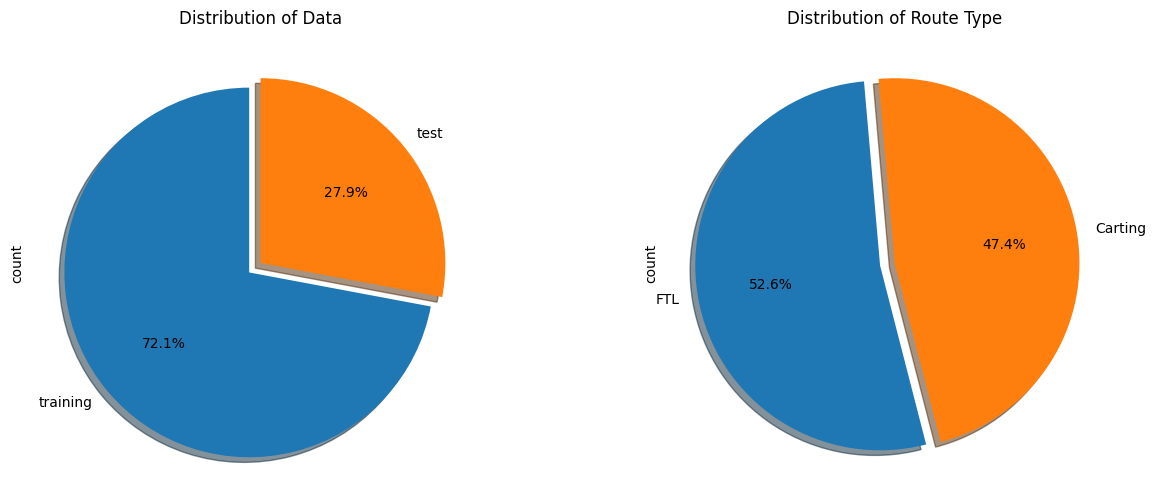

In [ ]:
# Distribution of Data and Route Type (pie chart)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
agg_df['data'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.08, 0), shadow=True)
plt.title('Distribution of Data')

plt.subplot(1, 2, 2)
agg_df['route_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=95, explode=(0.08, 0), shadow=True)
plt.title('Distribution of Route Type')
plt.show()

Insights:
- There are more Carting trips than FTL trips. Carting trips are around 53% and FTL trips are around 47%.
- There are more trainings data than testing data. Training data is around 72% and testing data is around 28%.

### Bivariate Analysis

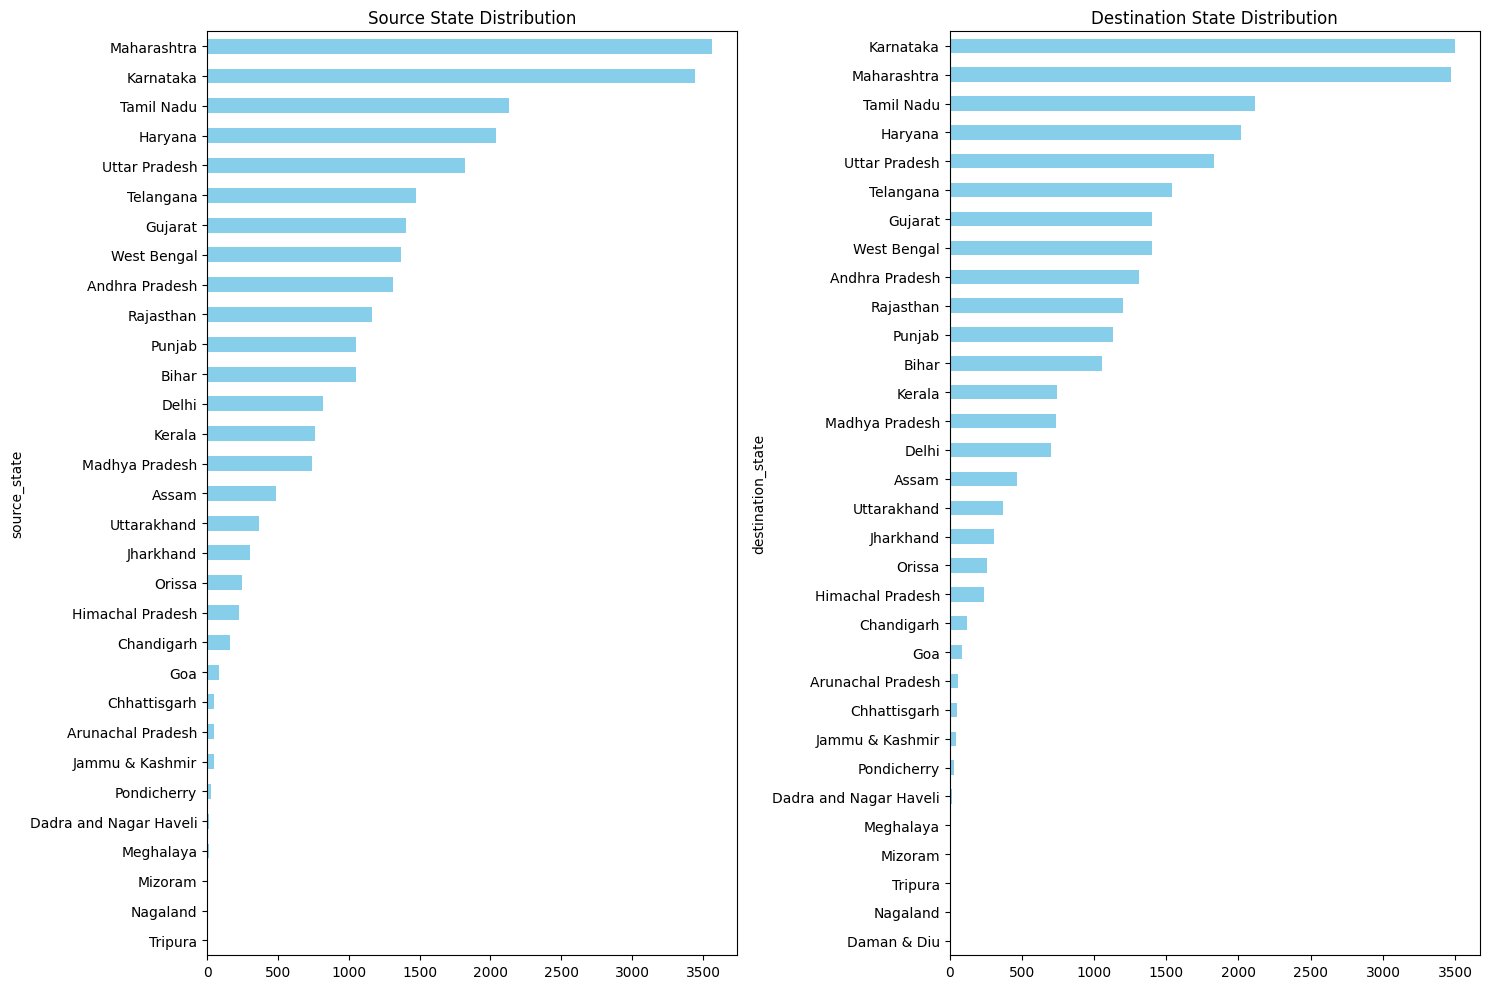

In [ ]:
# Source and Destination State Analysis
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
agg_df['source_state'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Source State Distribution')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
agg_df['destination_state'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Destination State Distribution')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Insights:
- Maharashtra has the highest number of source centers and second highest number of destination centers.
- Karnataka has the highest number of destination centers and second highest number of source centers.
- Tamil Nadu has the third highest number of source and destination centers.
- There is a consistent pattern in the order of the states with the highest number of source and destination centers.
- Mostly, the source and destination states are in the same order.
- Based on the insights, each state has a similar number of source and destination centers.

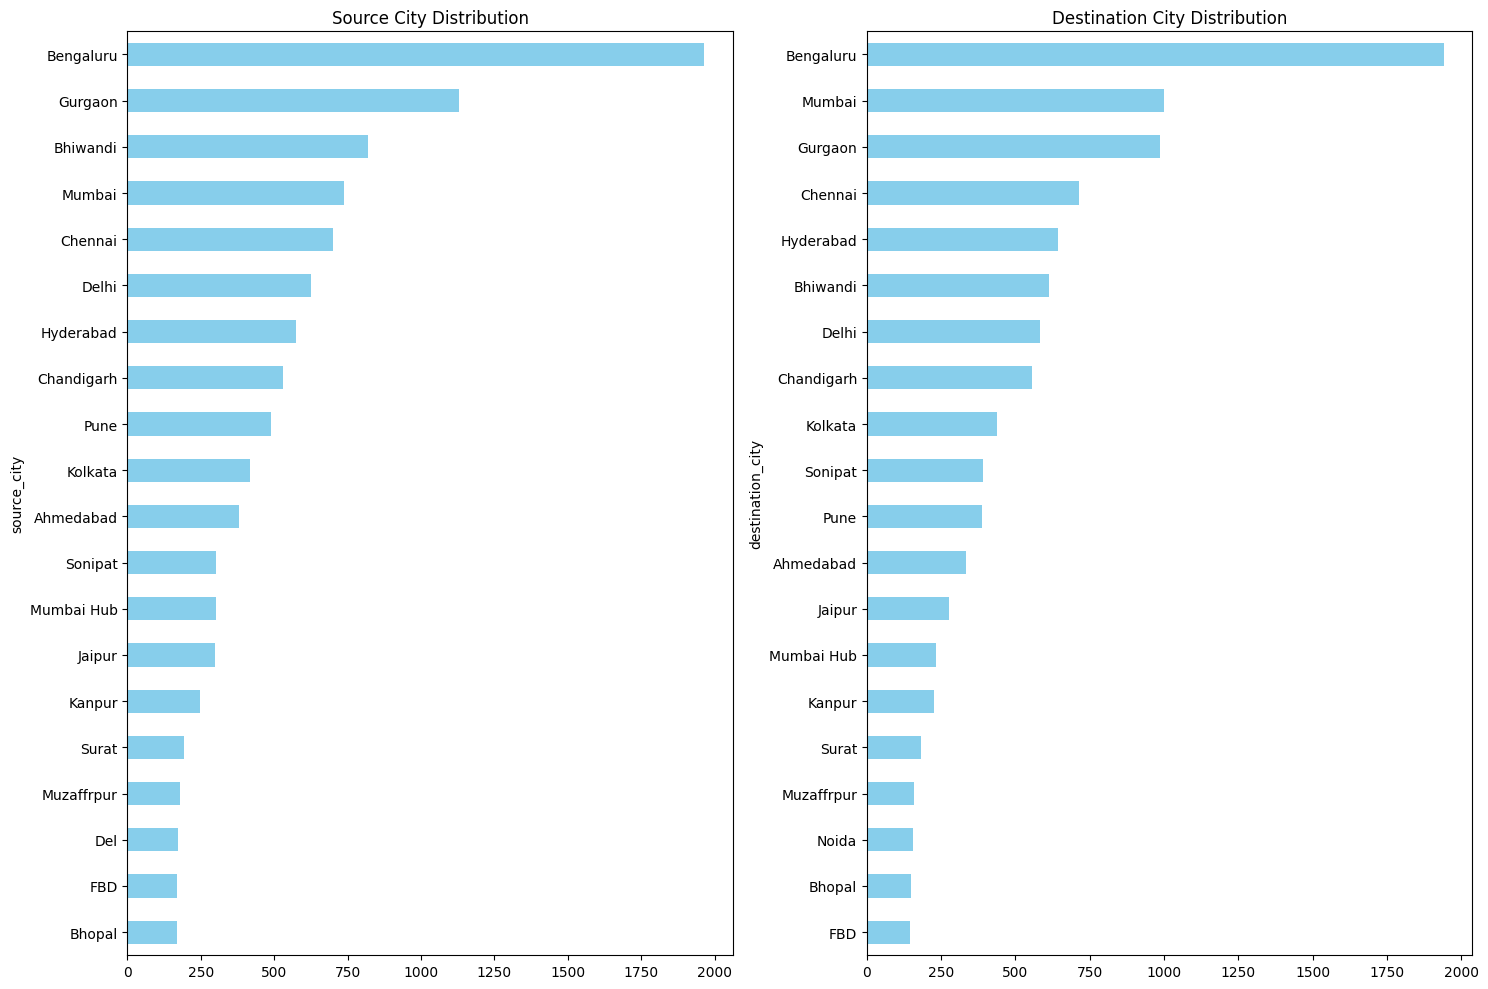

In [ ]:
# Source and Destination City Analysis
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
agg_df['source_city'].value_counts().head(20).plot(kind='barh', color='skyblue')
plt.title('Source City Distribution')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
agg_df['destination_city'].value_counts().head(20).plot(kind='barh', color='skyblue')
plt.title('Destination City Distribution')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Insights:
- As we can see, the city wise source and destination centers are almost the same as state wise data.
- Hence, proving the state wise insights.

Insights:


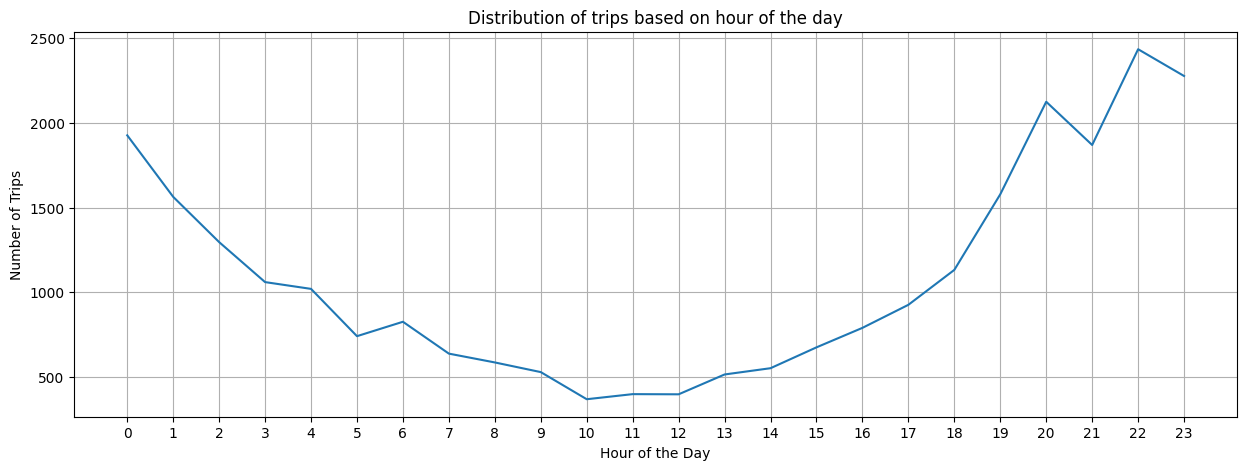

In [ ]:
# Distribution of trips based on hour of the day
plt.figure(figsize=(15, 5))
trip_counts_by_hour = agg_df['trip_creation_hour'].value_counts().sort_index()
sns.lineplot(x=trip_counts_by_hour.index, y=trip_counts_by_hour.values, palette='viridis')
plt.title('Distribution of trips based on hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

Insights:
- The trips are incresing after the noon. The trips are highest at 22:00 hours.
- The trips are declining after 22:00 hours and the trips are lowest at 11:00 hours.

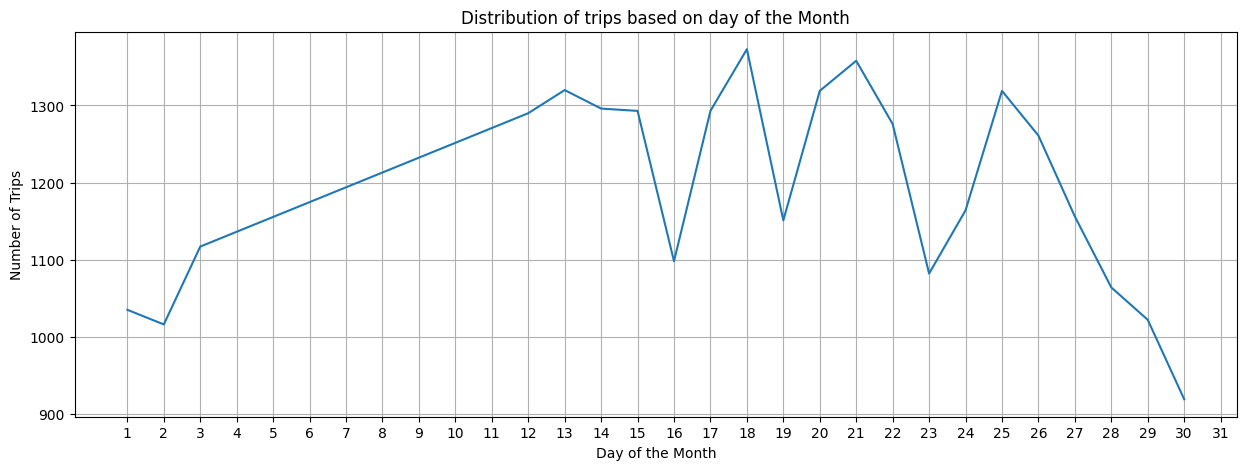

In [ ]:
# Distribution of trips based on day of the Month
plt.figure(figsize=(15, 5))
trip_counts_by_day = agg_df['trip_creation_day'].value_counts().sort_index()
sns.lineplot(x=trip_counts_by_day.index, y=trip_counts_by_day.values, palette='viridis')
plt.title('Distribution of trips based on day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.show()

Insights:
- Most of the trips are happened on the middle of the month.
- The trips are highest on the 17th of the month.
- The trips are declining after the 25th of the month and the trips are lowest on the 30st of the month.

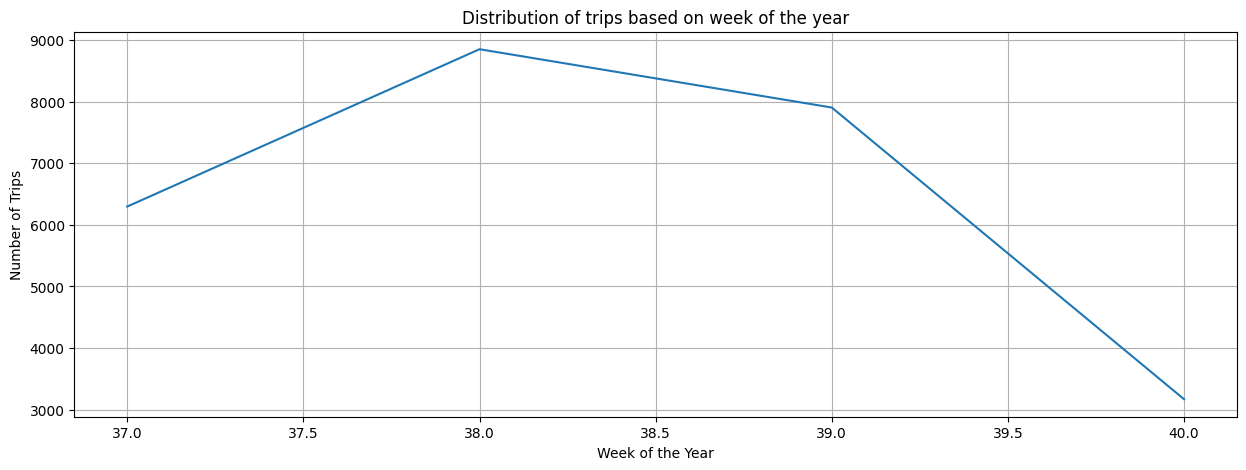

In [ ]:
# Distribution of trips based on week of the year
plt.figure(figsize=(15, 5))
trip_counts_by_week = agg_df['trip_creation_week'].value_counts().sort_index()
sns.lineplot(x=trip_counts_by_week.index, y=trip_counts_by_week.values, palette='viridis')
plt.title('Distribution of trips based on week of the year')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Trips')
plt.grid('both')
plt.show()

Insights:
- The trips are highest on 38th week of the year.
- The trips are declining after the 38th week of the year.
- The trips are lowest on the 40th week of the year.

<Figure size 1500x1500 with 0 Axes>

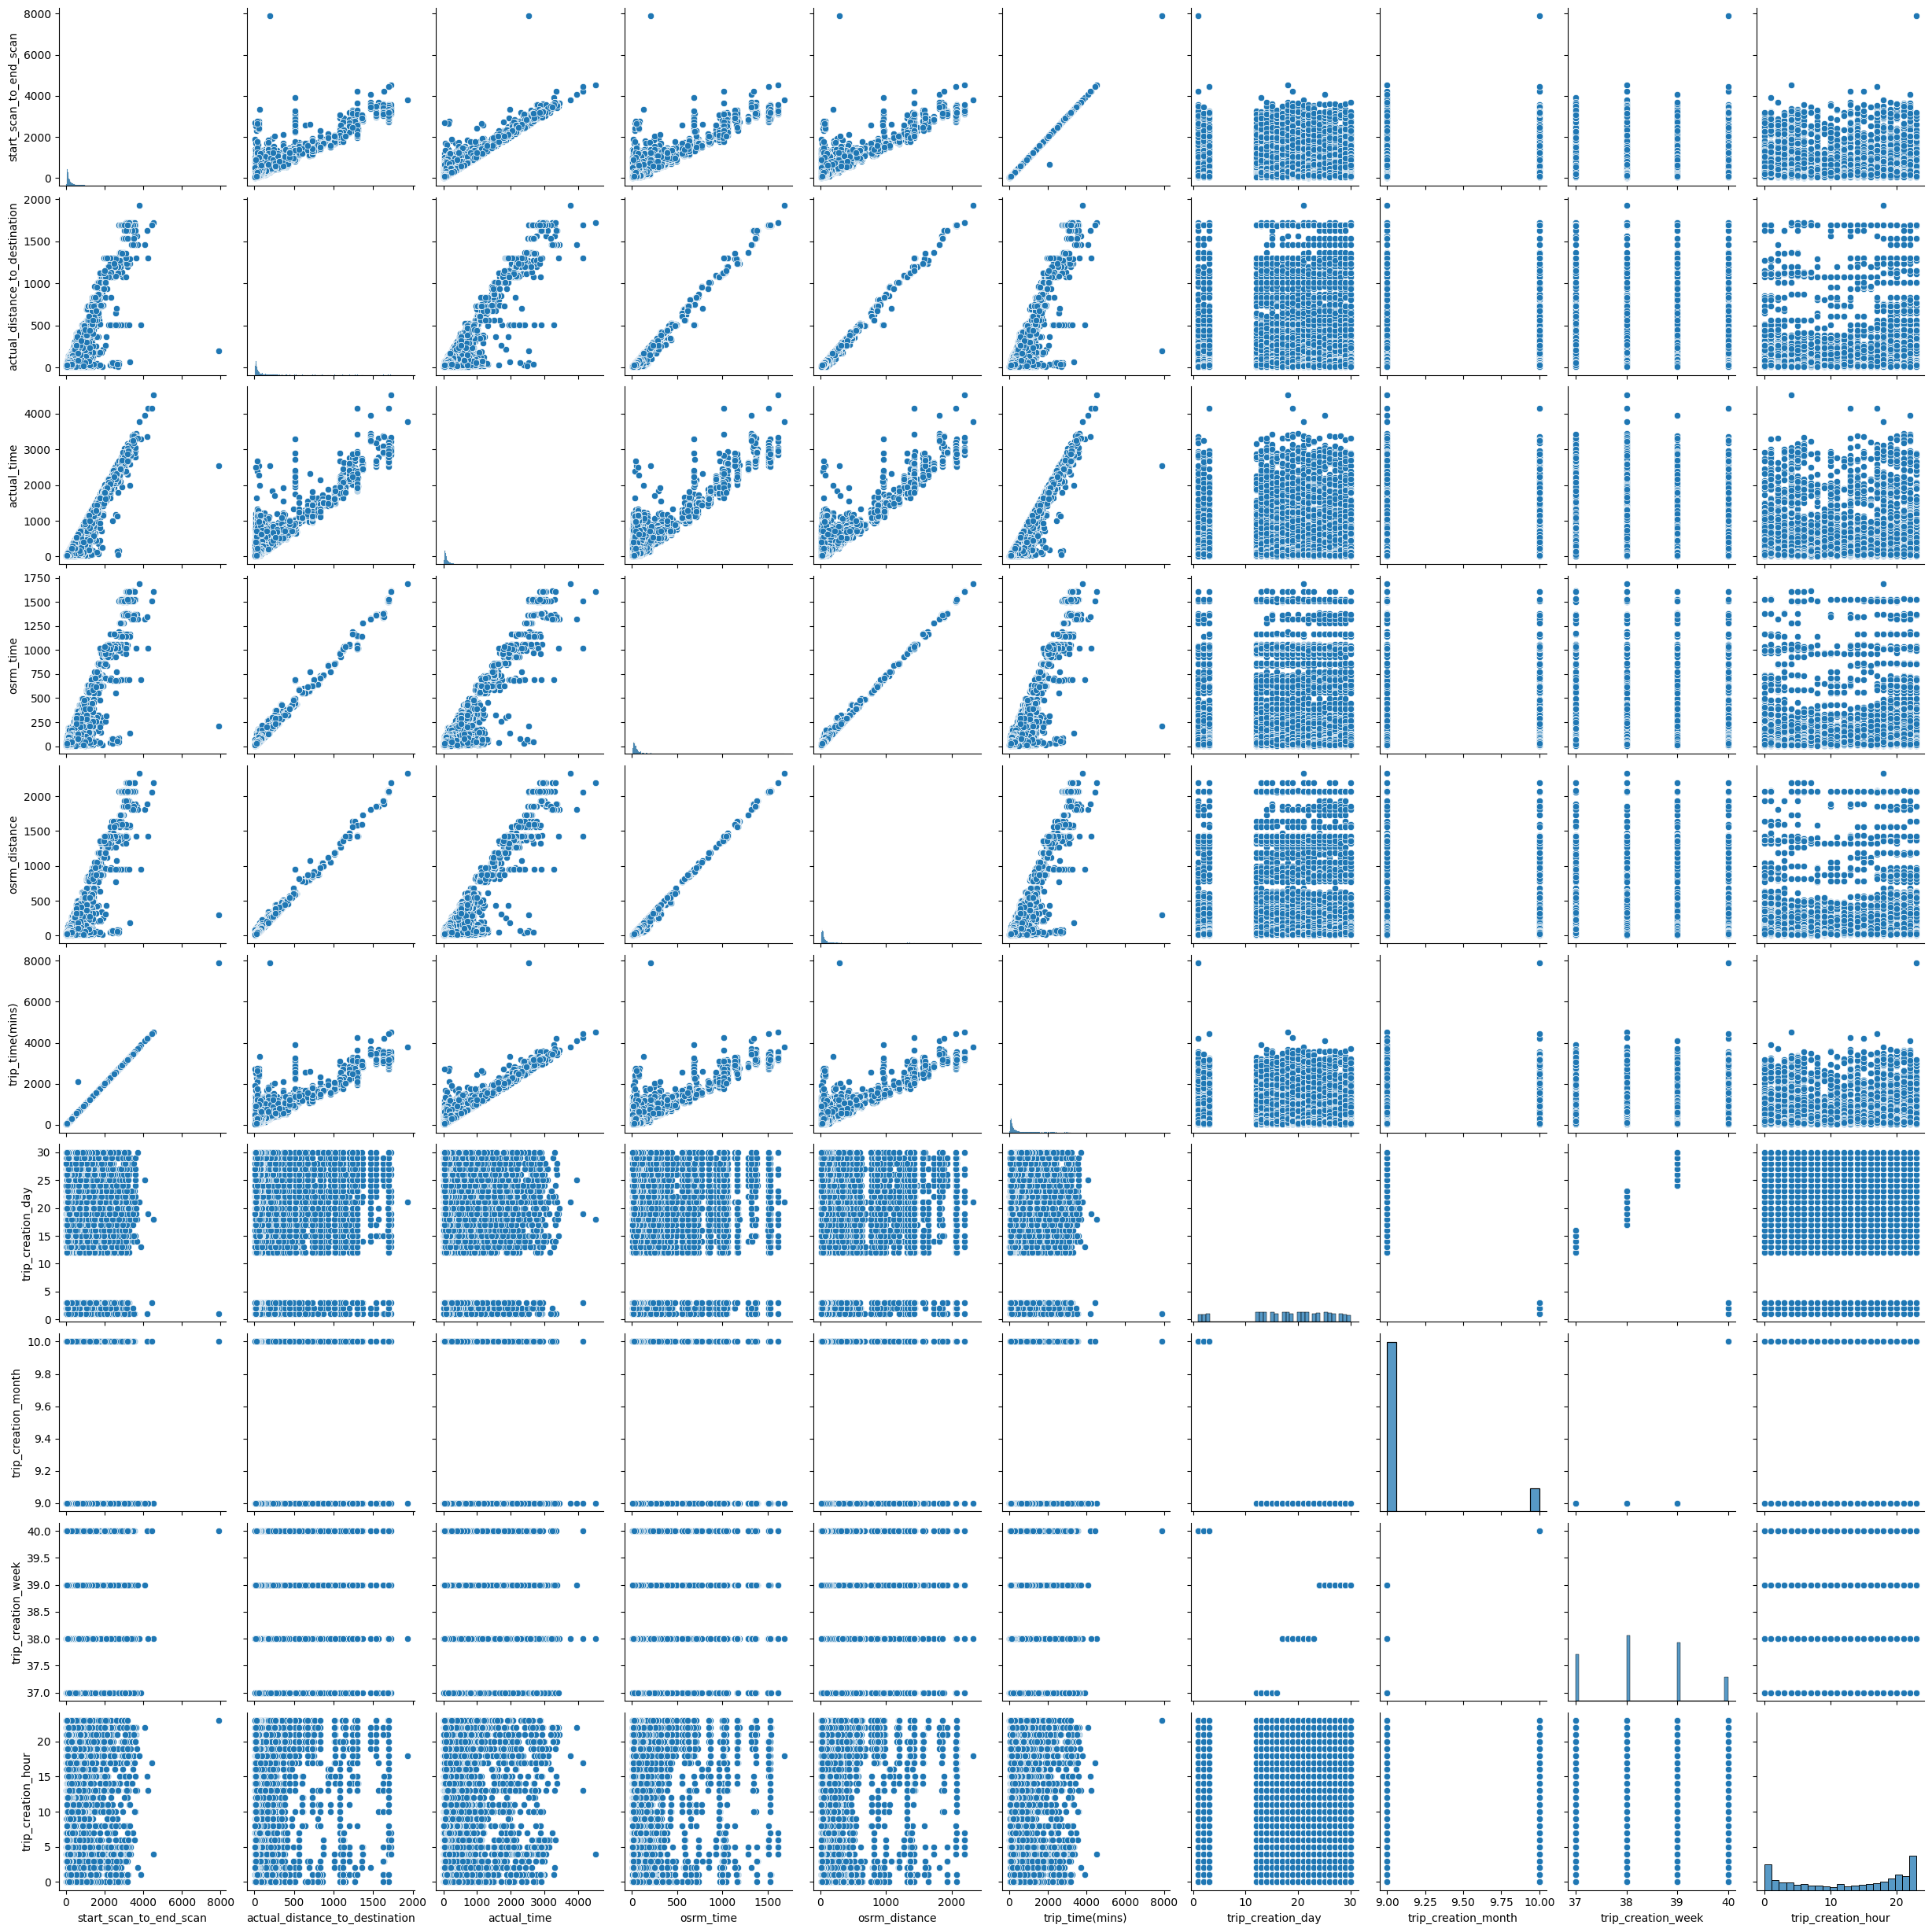

In [ ]:
# pairplot of numerical columns
num_cols = agg_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 15))
sns.pairplot(agg_df[num_cols])
plt.show()

Insights:
- There is a strong positive correlation between the start_scan_to_end_scan and the trip_time(mins) columns.
- There is also a kind of positive correlation between the actual_distance_to_destination and the osrm_distance columns.
- There is also a kind of positive correlation between the actual_time and the osrm_time columns.
- There is a strong positive correlation between the osrm_distance and the osrm_time columns.
- There is also a kind of positive correlation between the actual_distance_to_destination and the actual_time columns.

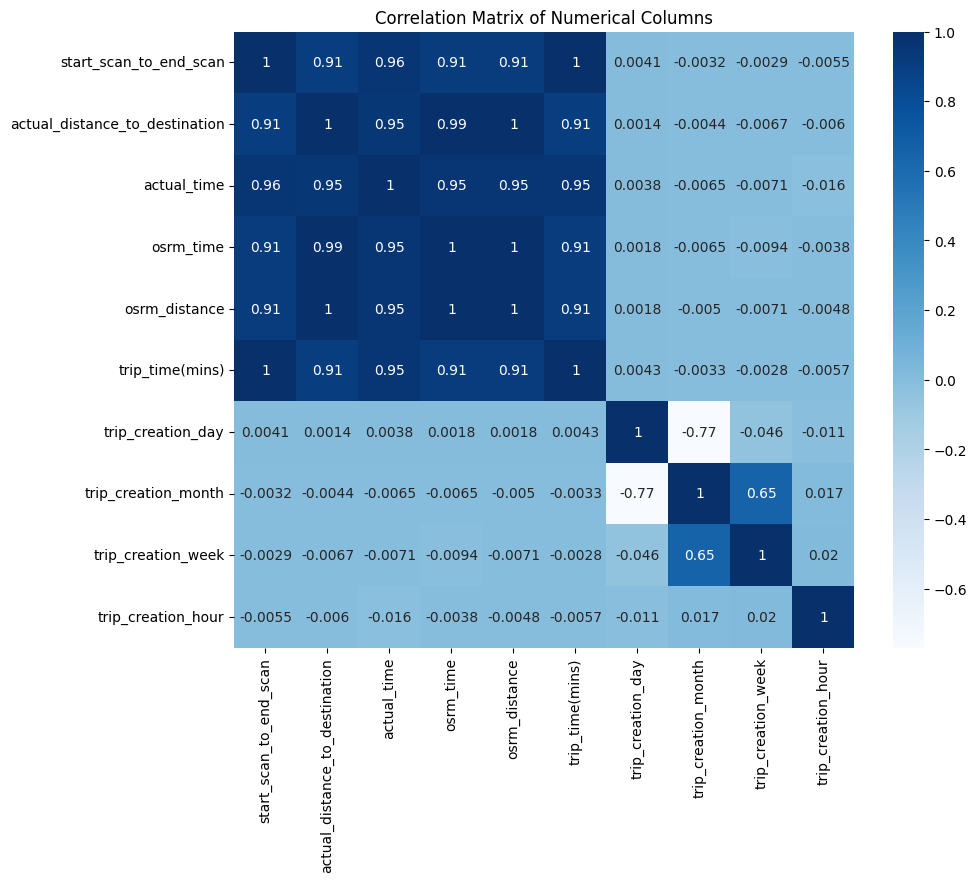

In [ ]:
# Correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(agg_df[num_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Insights:
- The correleation Matrix proves the Pair Plot insights.
- Trip Time and Start Scan to End Scan are highly correlated.

## Indepth Analysis - Feature Engineering

### Hypothesis Testing

#### 1. Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: There is no difference between od_total_time and start_scan_to_end_scan.
- Alternate Hypothesis: There is a difference between od_total_time and start_scan_to_end_scan.

Step 2: Identify the test
- Two Sample T-Test
    - To do the two-sample t-test, we need to check the assumptions:
        - Normality Test:
            - QQ Plot
            - Shapiro-Wilk Test
        - Homogeneity of Variance Test:
            - Levene Test
- Kolmogorov-Smirnov Test

Step 3: Decide the significance level
- Significance level is 0.05

Step 4: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis


In [ ]:
agg_df[['trip_time(mins)', 'start_scan_to_end_scan' ]].describe()

trip_time(mins)  start_scan_to_end_scan
count     26222.000000            26222.000000
mean        299.107278              298.553390
std         441.249287              441.116816
min          20.702813               20.000000
25%          90.977759               90.000000
50%         152.336732              152.000000
75%         307.285979              307.000000
max        7898.551955             7898.000000

Insights:
- Based on the statistical analysis, there is no difference between od_total_time and start_scan_to_end_scan.
- Will do the visual analysis to check the difference between od_total_time and start_scan_to_end_scan.

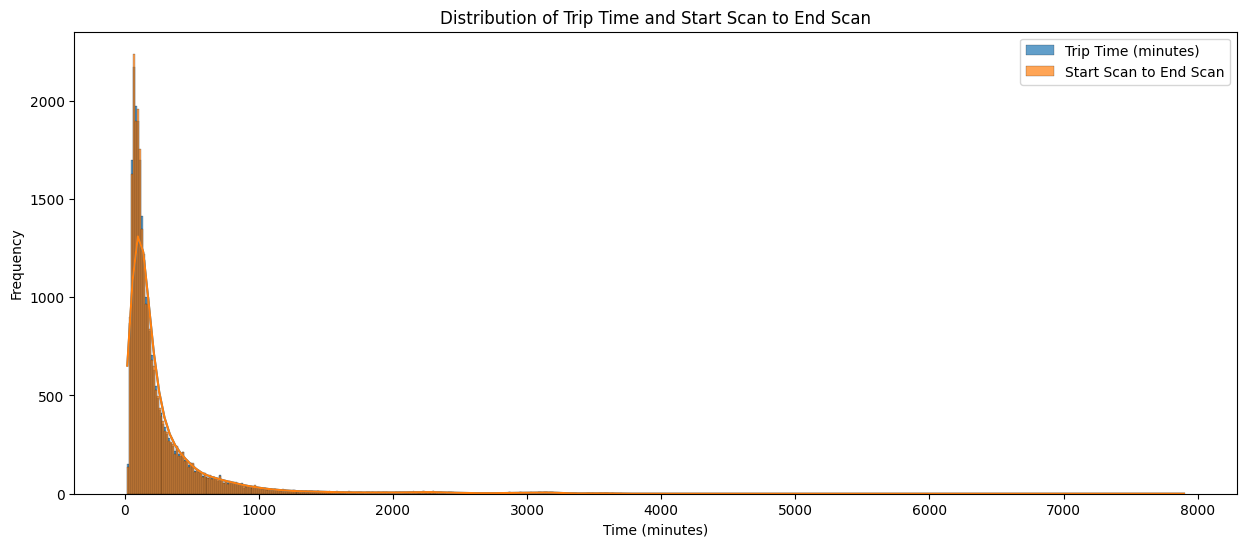

In [ ]:
def draw_histograms(data1, data2, label1, label2, title, x_label, y_label):
    # Set the figure size
    plt.figure(figsize=(15, 6))

    # Plot the histogram for data1
    sns.histplot(data1, kde=True, alpha=0.7, label=label1)

    # Plot the histogram for data2
    sns.histplot(data2, kde=True, alpha=0.7, label=label2)

    # Add title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add legend
    plt.legend()
    plt.show()

# Distribution of trip time and start scan to end scan
draw_histograms(agg_df['trip_time(mins)'], agg_df['start_scan_to_end_scan'], 'Trip Time (minutes)', 'Start Scan to End Scan',
                'Distribution of Trip Time and Start Scan to End Scan', 'Time (minutes)', 'Frequency')

Insights:
- Visual analysis also proves that there is no difference between od_total_time and start_scan_to_end_scan.

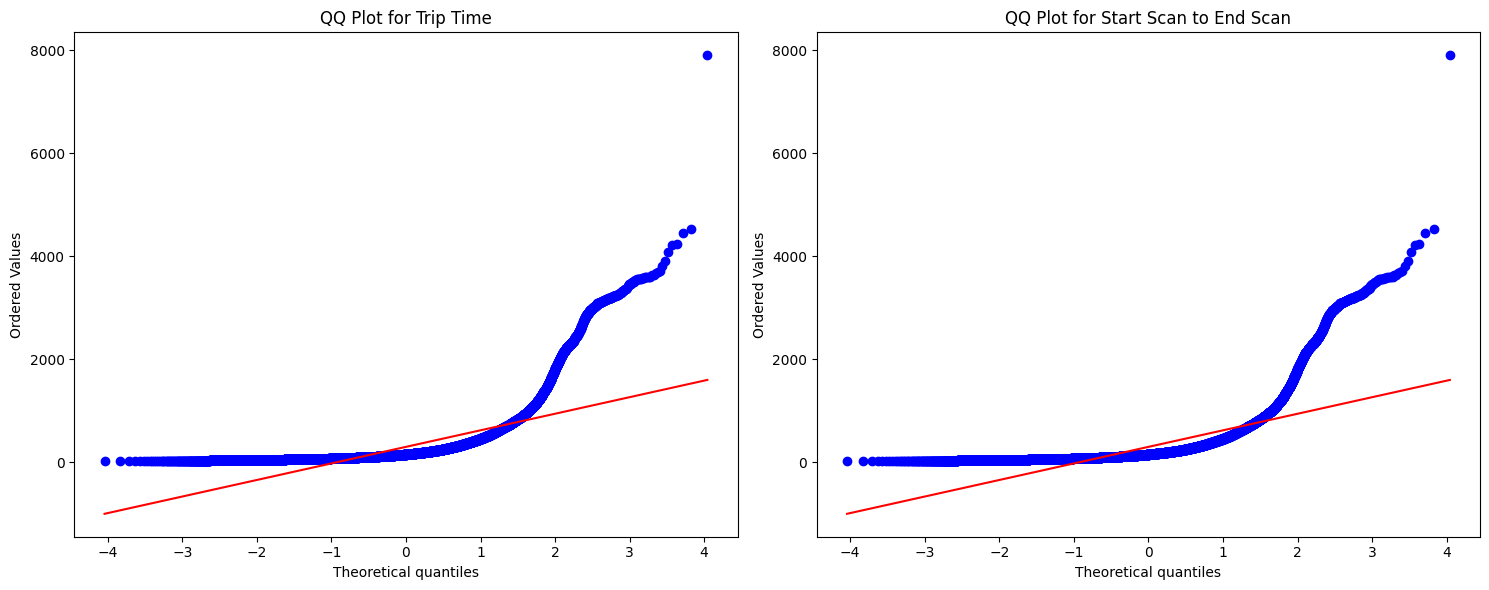

In [ ]:
def draw_qq_plot(data1, data2, title1, title2):
    # Create a figure and axis
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the QQ plot for Trip Time
    stats.probplot(data1, dist='norm', plot=ax[0])
    ax[0].set_title(title1)

    # Plot the QQ plot for Start Scan to End Scan
    stats.probplot(data2, dist='norm', plot=ax[1])
    ax[1].set_title(title2)

    plt.tight_layout()
    plt.show()

# QQ Plot for Trip Time and Start Scan to End Scan
draw_qq_plot(agg_df['trip_time(mins)'], agg_df['start_scan_to_end_scan'], 'QQ Plot for Trip Time', 'QQ Plot for Start Scan to End Scan')

Insights:
- From the graph, we can see that the both od_total_time and start_scan_to_end_scan are not normally distributed.
- Will quantify the results using Shapiro-Wilk Test.

Shapiro-Wilk Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is normally distributed.
- Alternate Hypothesis: The data is not normally distributed.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Shapiro-Wilk Test for Normality
def shapiro_wilk_test(data):
    stat, p_value = stats.shapiro(data)
    print(f'Shapiro-Wilk Test for Normality')
    print(f'Statistics: {stat}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The data is not normally distributed')
    else:
        print('The data is normally distributed')

shapiro_wilk_test(agg_df['trip_time(mins)'])
print('-' * 50)
shapiro_wilk_test(agg_df['start_scan_to_end_scan'])

Shapiro-Wilk Test for Normality
Statistics: 0.5304400949805688
p-value: 5.165804867926899e-122
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.5304338308747462
p-value: 5.161369599523079e-122
The data is not normally distributed


Levene Test: (Homogeneity of Variance Test)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data has equal variance.
- Alternate Hypothesis: The data does not have equal variance.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Levene's Test for Homogeneity of Variance
def levene_test(data1, data2):
    stat, p_value = stats.levene(data1, data2)
    print(f'Levene\'s Test for Homogeneity of Variance')
    print(f'Statistics: {stat}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The variances are not equal')
    else:
        print('The variances are equal')

levene_test(agg_df['trip_time(mins)'], agg_df['start_scan_to_end_scan'])

Levene's Test for Homogeneity of Variance
Statistics: 0.0002328353382060787
p-value: 0.9878256555192264
The variances are equal


Insights:
- Based on the statistical analysis, the data is not normally distributed.
- The data does have equal variance.
- Hence, we can't do the two-sample t-test.

Trying to convert the data to normal distribution using log transformation.

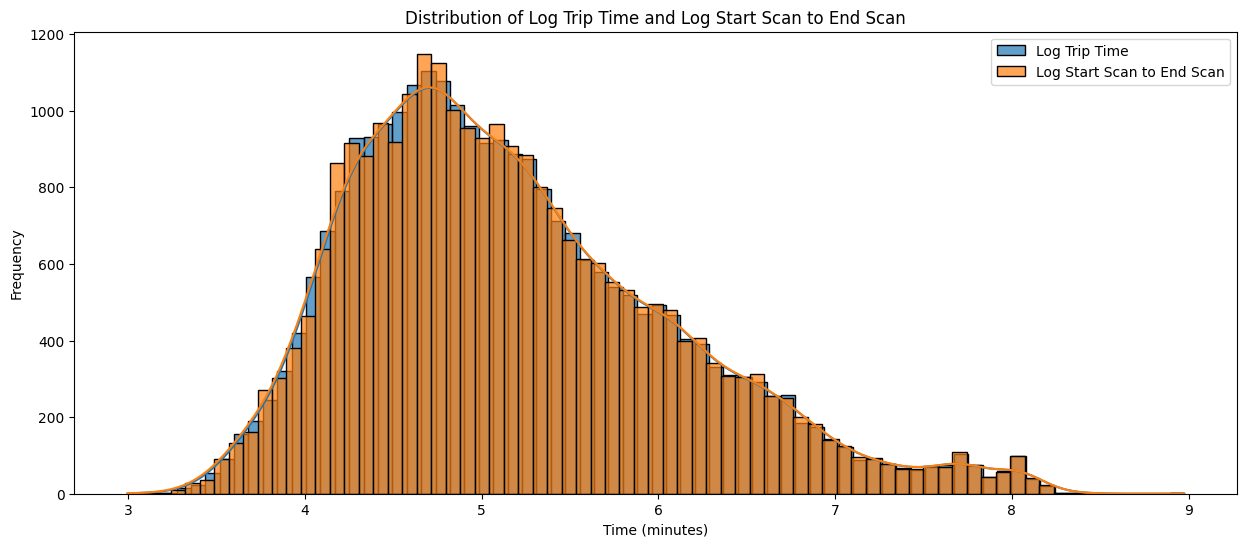

In [ ]:
def convert_to_log_normal_and_visualize(df, data1, data2, label1, label2, title, xlabel, ylabel):
    # Convert into Log Normal Distribution
    df['log_'+data1] = np.log(df[data1])
    df['log_'+data2] = np.log(df[data2])

    # Draw Histograms
    draw_histograms(df['log_'+data1], df['log_'+data2], label1, label2, title, xlabel, ylabel)

convert_to_log_normal_and_visualize(agg_df,'trip_time(mins)', 'start_scan_to_end_scan', 'Log Trip Time', 'Log Start Scan to End Scan', 'Distribution of Log Trip Time and Log Start Scan to End Scan', 'Time (minutes)', 'Frequency')


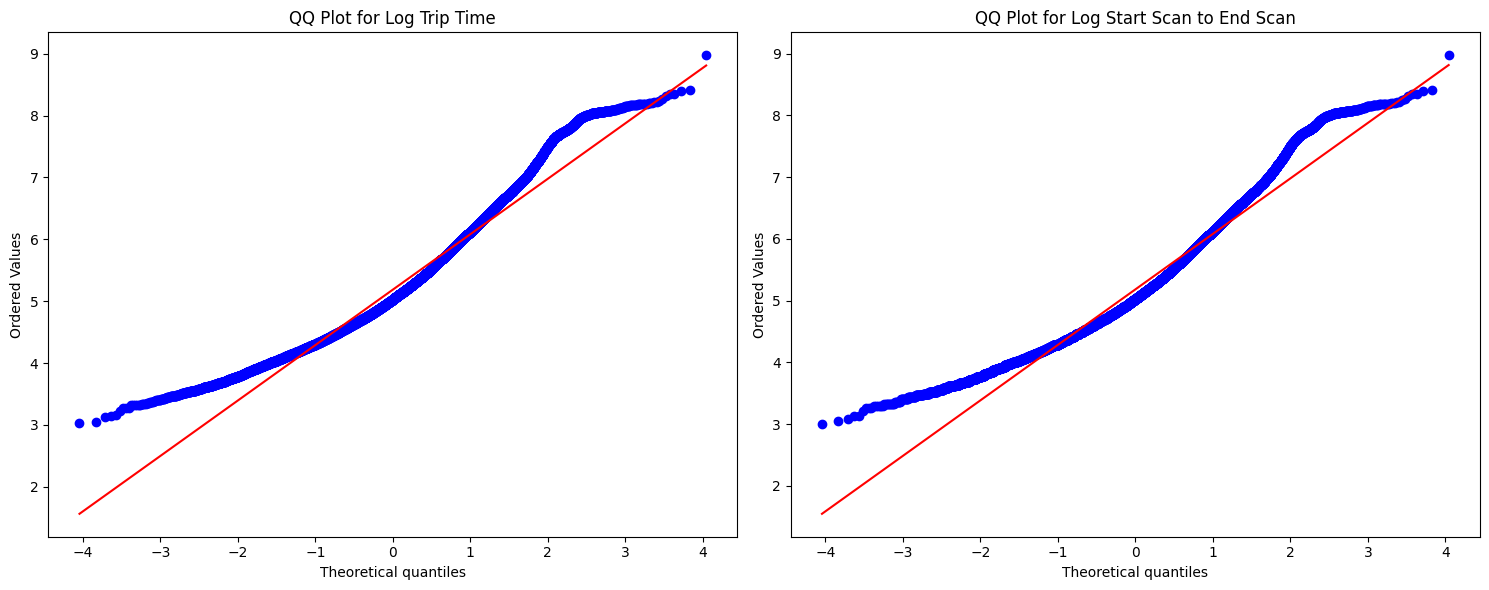

In [ ]:
draw_qq_plot(agg_df['log_trip_time(mins)'], agg_df['log_start_scan_to_end_scan'], 'QQ Plot for Log Trip Time', 'QQ Plot for Log Start Scan to End Scan')

In [ ]:
# shapiro_wilk_test for Log Normal Distribution
shapiro_wilk_test(agg_df['log_trip_time(mins)'])
print('-' * 50)
shapiro_wilk_test(agg_df['log_start_scan_to_end_scan'])

Shapiro-Wilk Test for Normality
Statistics: 0.9590723731359648
p-value: 1.8284089200671066e-63
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.9596914530086159
p-value: 3.689691261086178e-63
The data is not normally distributed


Insights:
- Even after log transformation, the data is not normally distributed.
- Hence, we can't do the two-sample t-test.
- Will go with Kolmogorov-Smirnov Test.

In [ ]:
# Drop the log transformed columns
agg_df.drop(['log_trip_time(mins)', 'log_start_scan_to_end_scan'], axis=1, inplace=True)

Kolmogorov-Smirnov Test: (Non-Parametric Test)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is from the same distribution.
- Alternate Hypothesis: The data is not from the same distribution.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# 2 Sample KS Test for Non-Normal Distribution
def ks_test(data1, data2):
    stat, p_value = stats.ks_2samp(data1, data2)
    print(f'2 Sample KS Test for Non-Normal Distribution')
    print(f'Statistics: {stat}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The distributions are different')
    else:
        print('The distributions are same')

ks_test(agg_df['trip_time(mins)'], agg_df['start_scan_to_end_scan'])

2 Sample KS Test for Non-Normal Distribution
Statistics: 0.006902600869498898
p-value: 0.5575053318743617
The distributions are same


Insights:
- Based on the statistical analysis, the data is from the same distribution.
- Hence, there is no difference between od_total_time and start_scan_to_end_scan.

#### 2. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: There is no difference between actual_time and OSRM time.
- Alternate Hypothesis: There is a difference between actual_time and OSRM time.

Step 2: Identify the test
- Two Sample T-Test
    - To do the two-sample t-test, we need to check the assumptions:
        - Normality Test:
            - QQ Plot
            - Shapiro-Wilk Test
        - Homogeneity of Variance Test:
            - Levene Test
- Kolmogorov-Smirnov Test

Step 3: Decide the significance level
- Significance level is 0.05

Step 4: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
agg_df_2[['actual_time', 'osrm_time']].describe()

actual_time     osrm_time
count  14787.000000  14787.000000
mean     251.134375    108.303645
std      455.202399    218.447496
min        9.000000      6.000000
25%       56.000000     24.000000
50%       98.000000     41.000000
75%      213.000000     82.000000
max     4532.000000   1686.000000

Insights:
- Based on the statistical data, there is a difference between actual_time and OSRM time.
- Will do the visual analysis to check the difference between actual_time and OSRM time.

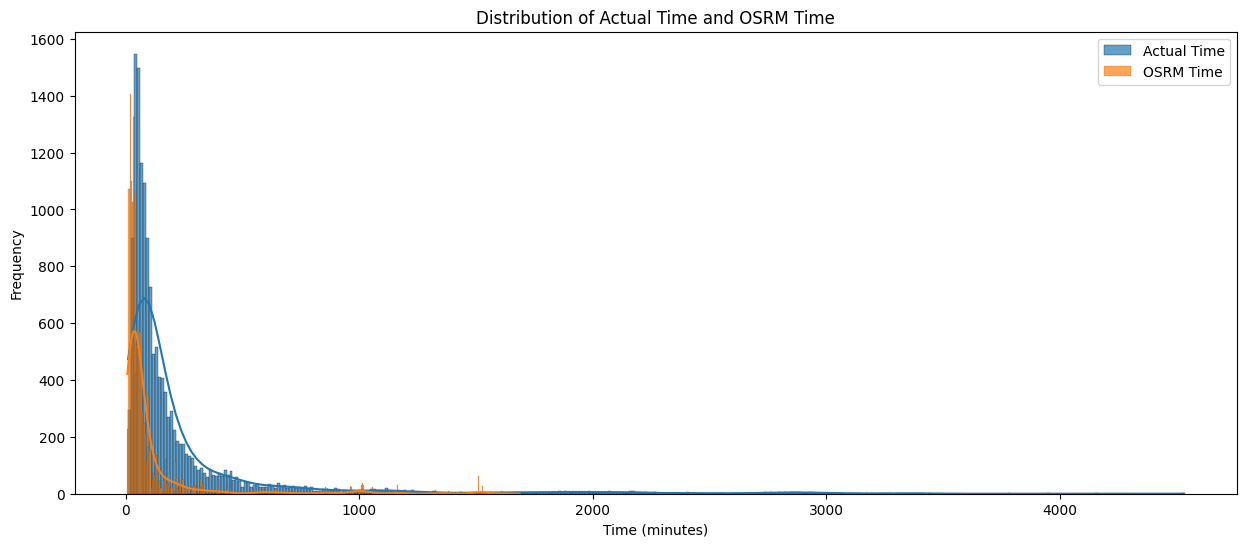

In [ ]:

# Distribution of Actual Time and OSRM Time
draw_histograms(agg_df_2['actual_time'], agg_df_2['osrm_time'], 'Actual Time', 'OSRM Time',
                'Distribution of Actual Time and OSRM Time', 'Time (minutes)', 'Frequency')

Insights:
- Visual analysis also proves that there is a slight difference between actual_time and OSRM time.
- Using Statistical methods, we can test whether the difference is significant or not.

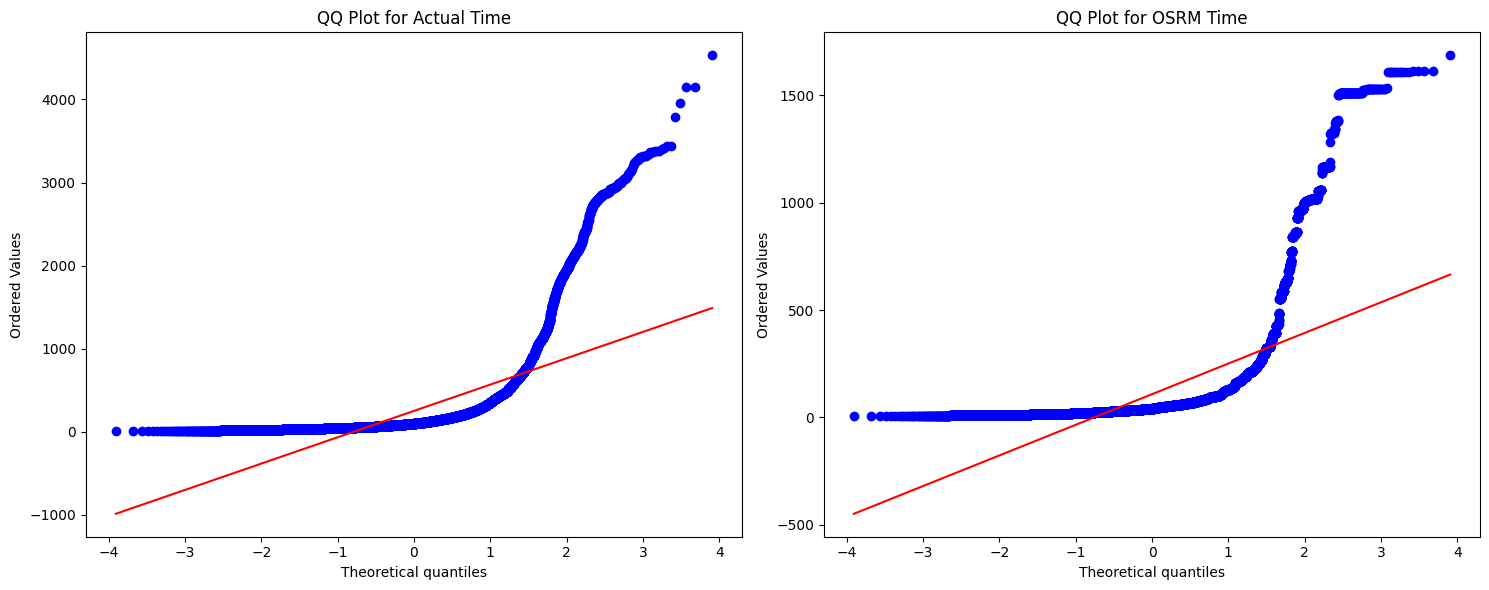

In [ ]:
# Draw QQ Plot for Actual Time and OSRM Time
draw_qq_plot(agg_df_2['actual_time'], agg_df_2['osrm_time'], 'QQ Plot for Actual Time', 'QQ Plot for OSRM Time')

Insights:
- From the graph, we can see that the both actual_time and OSRM time are not normally distributed.
- Will quantify the results using Shapiro-Wilk Test.

Shapiro-Wilk Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is normally distributed.
- Alternate Hypothesis: The data is not normally distributed.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['actual_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['osrm_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.48501426291685024
p-value: 8.503891476364121e-109
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.4258338184867536
p-value: 1.1976397286640894e-111
The data is not normally distributed


In [ ]:
# Levene's Test for Homogeneity of Variance
levene_test(agg_df_2['actual_time'], agg_df_2['osrm_time'])

Levene's Test for Homogeneity of Variance
Statistics: 759.4074137696683
p-value: 4.417722834578231e-165
The variances are not equal


Insights:
- Based on the statistical analysis, the data is not normally distributed.
- The data does not have equal variance.
- Hence, we can't do the two-sample t-test.

Trying to convert the data to normal distribution using log transformation.

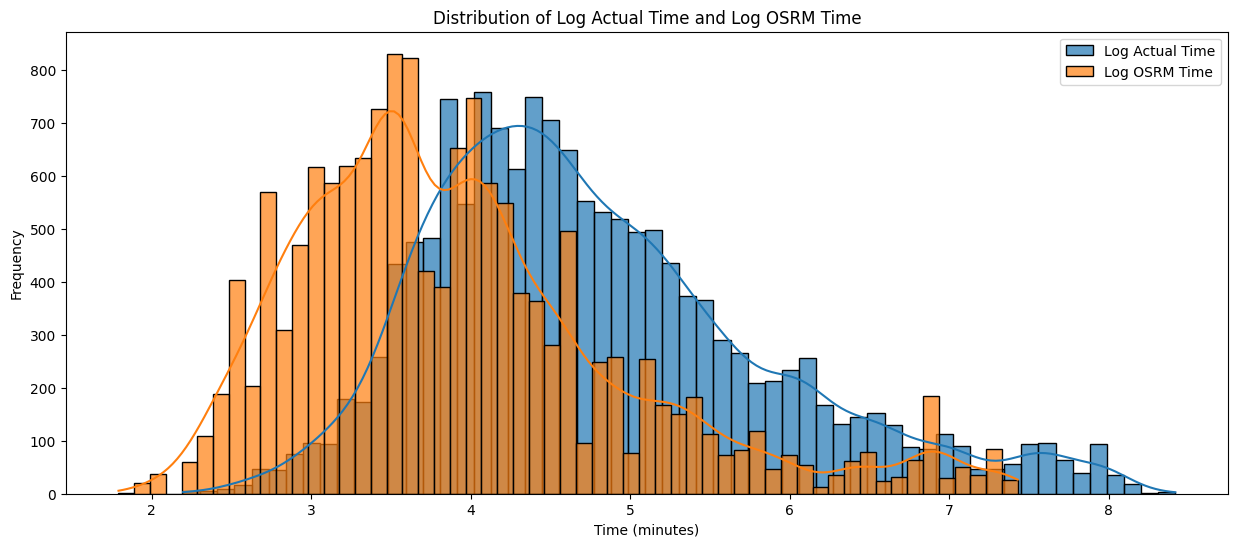

In [ ]:
# Convert the actual and osrm time into log normal distribution
convert_to_log_normal_and_visualize(agg_df_2, 'actual_time', 'osrm_time', 'Log Actual Time', 'Log OSRM Time', 'Distribution of Log Actual Time and Log OSRM Time', 'Time (minutes)', 'Frequency')

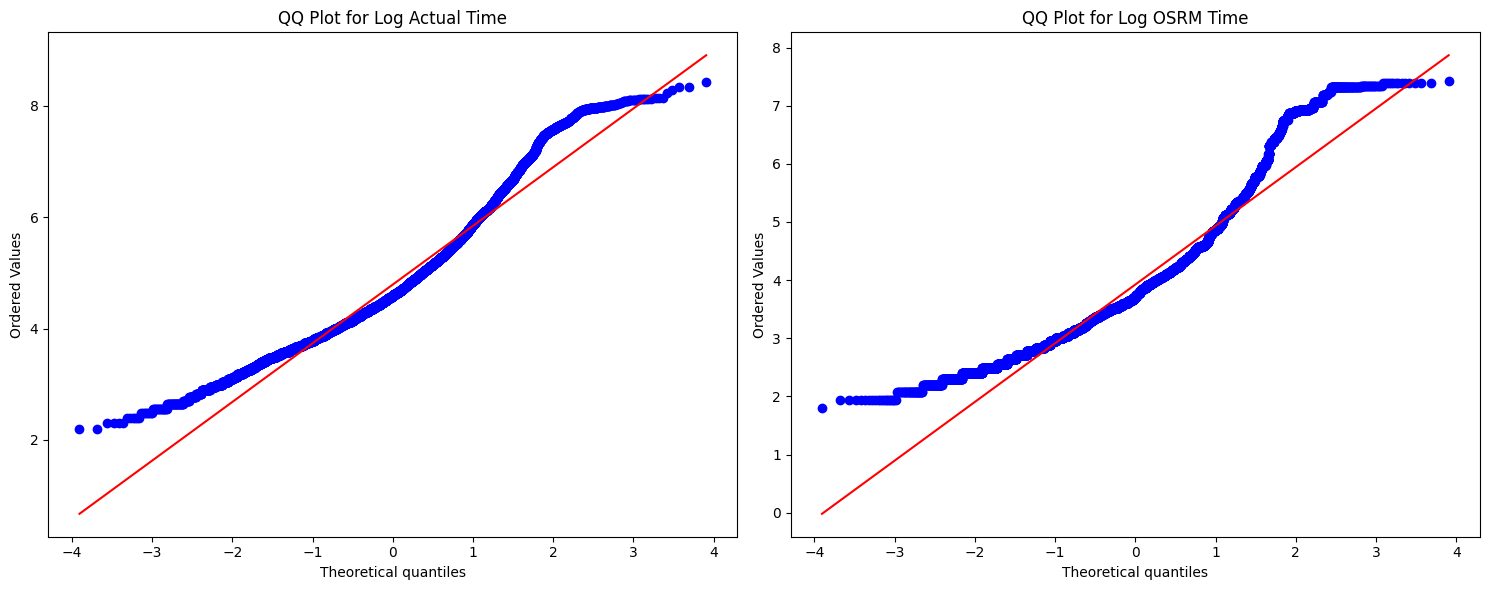

In [ ]:
# Draw QQ Plot for Log Actual Time and Log OSRM Time
draw_qq_plot(agg_df_2['log_actual_time'], agg_df_2['log_osrm_time'], 'QQ Plot for Log Actual Time', 'QQ Plot for Log OSRM Time')


In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['log_actual_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['log_osrm_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.9545744613556878
p-value: 6.567287903162743e-55
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.9302214562901787
p-value: 4.4552379315422194e-63
The data is not normally distributed


Insights:
- Even after log transformation, the data is not normally distributed.
- Hence, we can't do the two-sample t-test.
- Will go with Kolmogorov-Smirnov Test.

In [ ]:
# Drop the log transformed columns
agg_df_2.drop(['log_actual_time', 'log_osrm_time'], axis=1, inplace=True)

Kolmogorov-Smirnov Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is from the same distribution.
- Alternate Hypothesis: The data is not from the same distribution.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
#  2 Sample KS Test for Non-Normal Distribution
ks_test(agg_df_2['actual_time'], agg_df_2['osrm_time'])

2 Sample KS Test for Non-Normal Distribution
Statistics: 0.36904037330087236
p-value: 0.0
The distributions are different


Insights:
- Based on the statistical analysis, the data is not from the same distribution.
- Hence, there is a difference between actual_time and OSRM time.

#### 3. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: There is no difference between actual_time and segment actual time.
- Alternate Hypothesis: There is a difference between actual_time and segment actual time.

Step 2: Identify the test
- Two Sample T-Test
    - To do the two-sample t-test, we need to check the assumptions:
        - Normality Test:
            - QQ Plot
            - Shapiro-Wilk Test
        - Homogeneity of Variance Test:
            - Levene Test
- Kolmogorov-Smirnov Test

Step 3: Decide the significance level
- Significance level is 0.05

Step 4: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
agg_df_2[['actual_time', 'segment_actual_time']].describe()

actual_time  segment_actual_time
count  14787.000000         14787.000000
mean     251.134375           353.059174
std      455.202399           556.365911
min        9.000000             9.000000
25%       56.000000            66.000000
50%       98.000000           147.000000
75%      213.000000           364.000000
max     4532.000000          6230.000000

Insights:
- Based on the statistical data, there is no difference between actual_time and segment_actual_time.
- Will do the visual analysis to check the difference between actual_time and segment_actual_time.

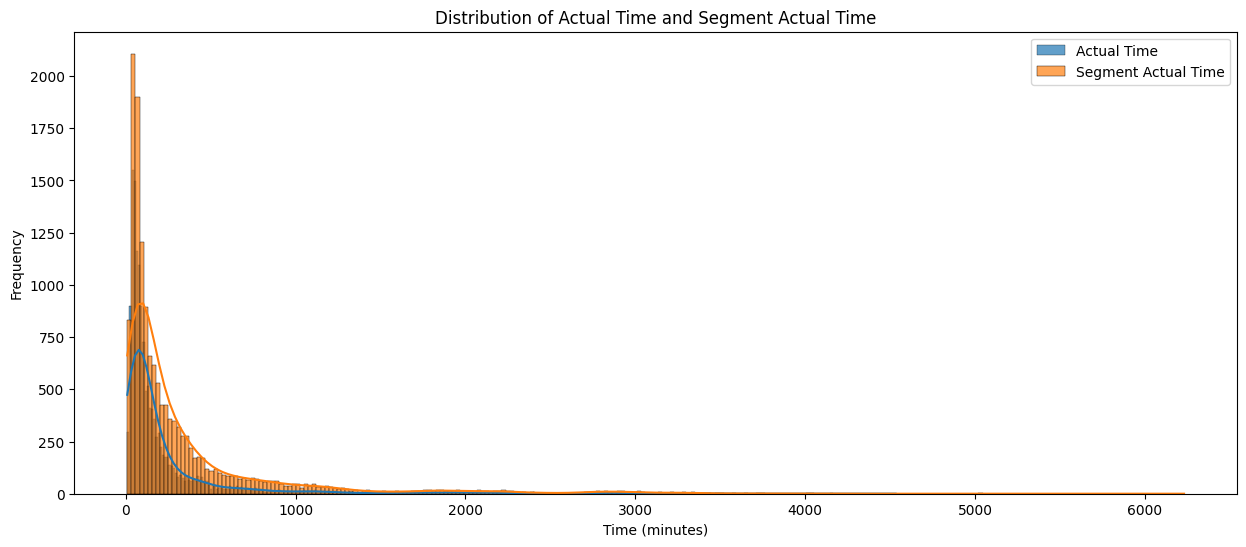

In [ ]:
# Distribution of Actual Time and Segment Actual Time
draw_histograms(agg_df_2['actual_time'], agg_df_2['segment_actual_time'], 'Actual Time', 'Segment Actual Time',
                'Distribution of Actual Time and Segment Actual Time', 'Time (minutes)', 'Frequency')

Insights:
- Visual analysis also proves that there is no difference between actual_time and segment_actual_time.
- Using Statistical methods, we can test whether the conclusion is correct or not.

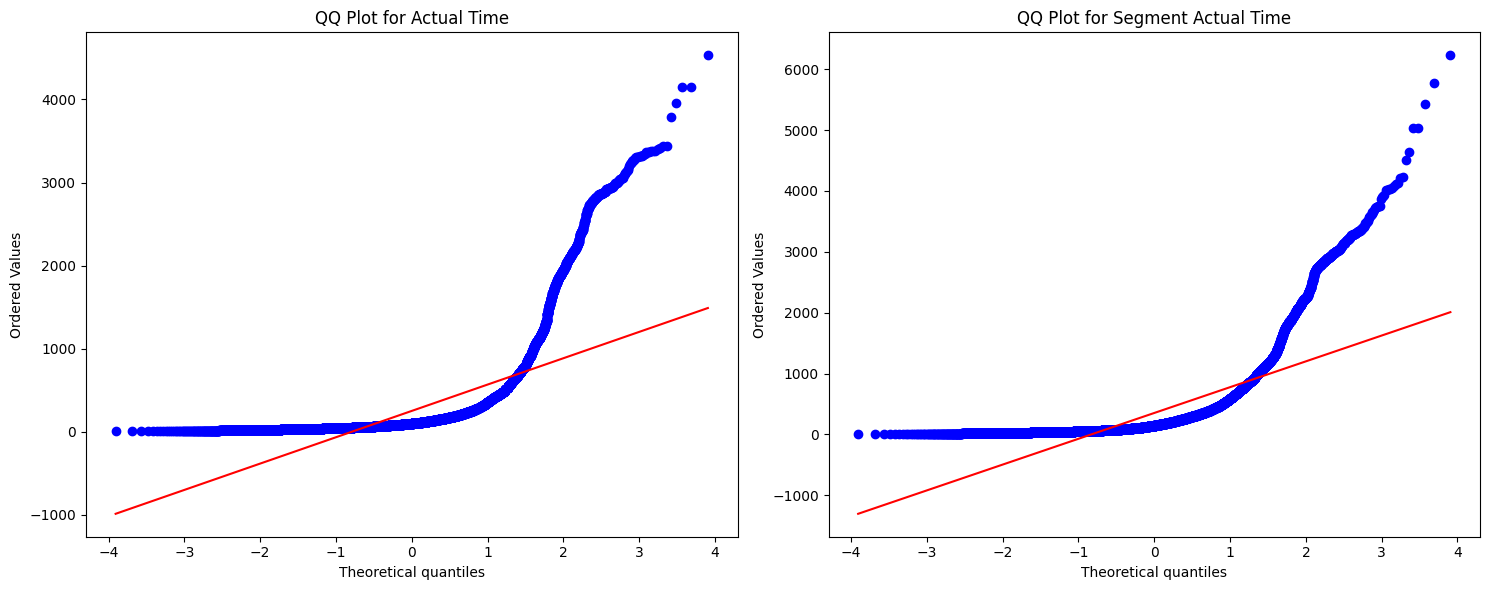

In [ ]:
# Draw QQ Plot for Actual Time and Segment Actual Time
draw_qq_plot(agg_df_2['actual_time'], agg_df_2['segment_actual_time'], 'QQ Plot for Actual Time', 'QQ Plot for Segment Actual Time')

Insights:
- From the graph, we can see that the both actual_time and segment_actual_time are not normally distributed.
- Will quantify the results using Shapiro-Wilk Test.

Shapiro-Wilk Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is normally distributed.
- Alternate Hypothesis: The data is not normally distributed.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['actual_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['segment_actual_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.48501426291685024
p-value: 8.503891476364121e-109
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.5808456330535781
p-value: 1.6746386852473887e-103
The data is not normally distributed


In [ ]:
# Levene's Test for Homogeneity of Variance
levene_test(agg_df_2['actual_time'], agg_df_2['segment_actual_time'])

Levene's Test for Homogeneity of Variance
Statistics: 243.3695387395901
p-value: 1.1969205169904284e-54
The variances are not equal


Insights:
- Based on the statistical analysis, the data is not normally distributed.
- The data does have equal variance.
- Hence, we can't do the two-sample t-test.

Trying to convert the data to normal distribution using log transformation.

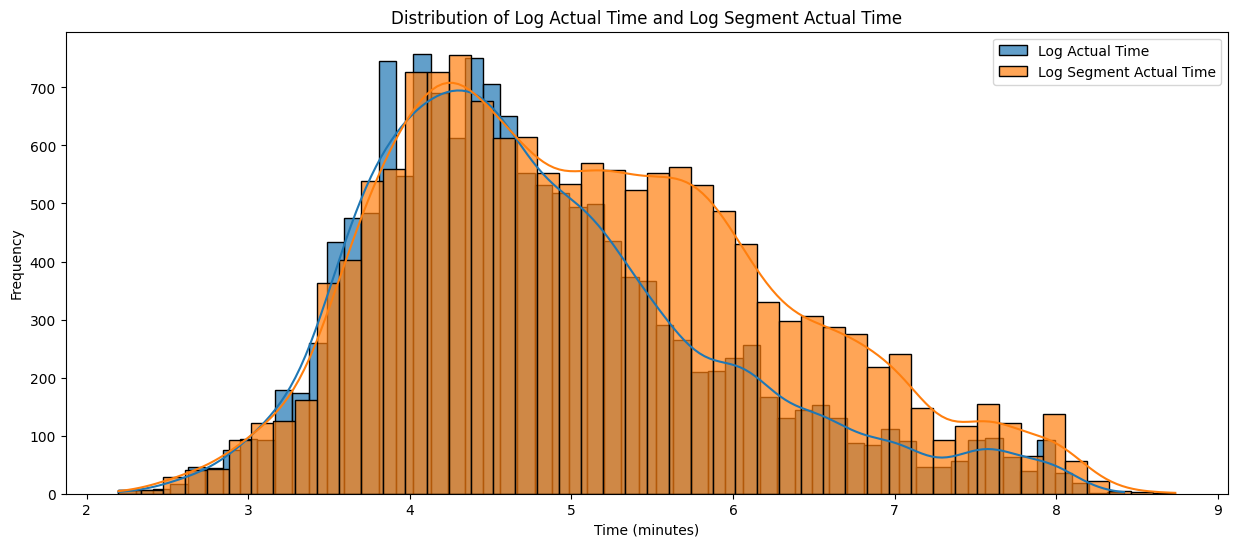

In [ ]:
# convert the actual and segment actual time into log normal distribution
convert_to_log_normal_and_visualize(agg_df_2, 'actual_time', 'segment_actual_time', 'Log Actual Time', 'Log Segment Actual Time', 'Distribution of Log Actual Time and Log Segment Actual Time', 'Time (minutes)', 'Frequency')

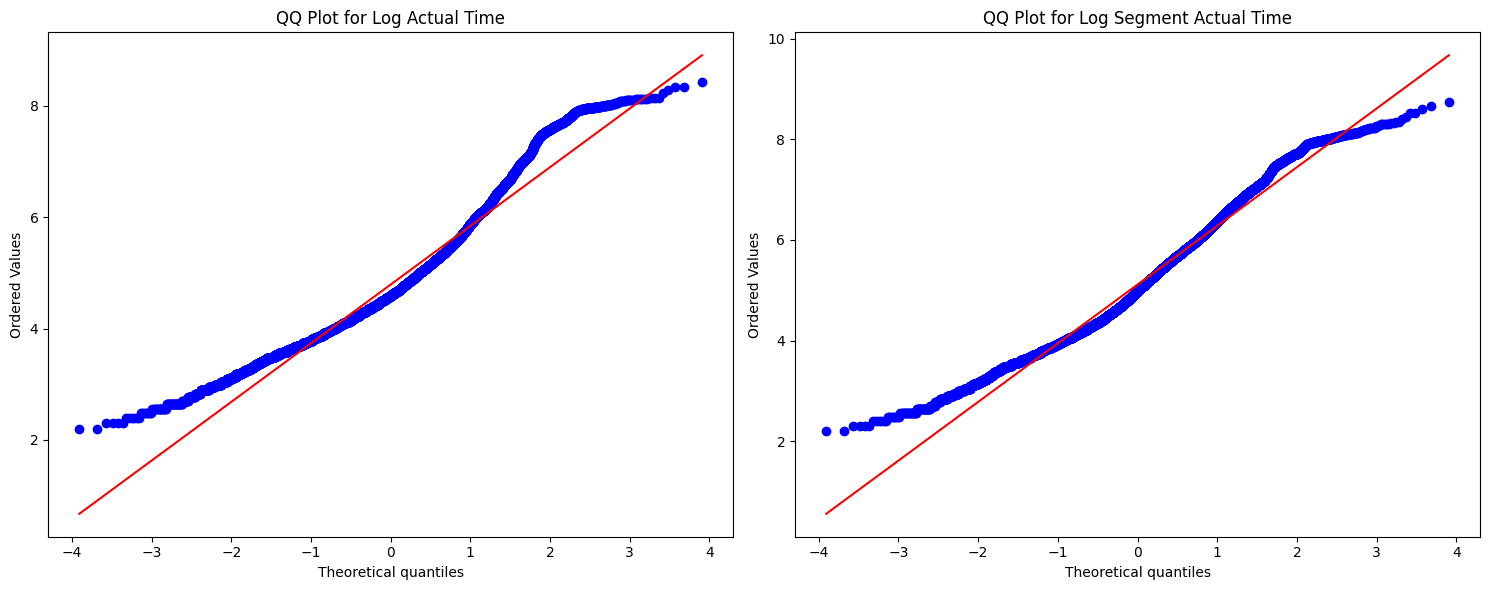

In [ ]:
# Draw QQ Plot for Log Actual Time and Log Segment Actual Time
draw_qq_plot(agg_df_2['log_actual_time'], agg_df_2['log_segment_actual_time'], 'QQ Plot for Log Actual Time', 'QQ Plot for Log Segment Actual Time')

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['log_actual_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['log_segment_actual_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.9545744613556878
p-value: 6.567287903162743e-55
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.979044236364028
p-value: 1.170653393709495e-41
The data is not normally distributed


Insights:
- Even after log transformation, the data is not normally distributed.
- Hence, we can't do the two-sample t-test.
- Will go with Kolmogorov-Smirnov Test.

In [ ]:
# Drop the log transformed columns
agg_df_2.drop(['log_actual_time', 'log_segment_actual_time'], axis=1, inplace=True)

Kolmogorov-Smirnov Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is from the same distribution.
- Alternate Hypothesis: The data is not from the same distribution.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# 2 Sample KS Test for Non-Normal Distribution
ks_test(agg_df_2['actual_time'], agg_df_2['segment_actual_time'])

2 Sample KS Test for Non-Normal Distribution
Statistics: 0.14749442077500508
p-value: 7.29925803783217e-141
The distributions are different


Insights:
- Based on the statistical analysis, the data is from the same distribution.
- Hence, there is no difference between actual_time and segment_actual_time.

#### 4. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: There is no difference between osrm_distance and segment_osrm_distance.
- Alternate Hypothesis: There is a difference between osrm_distance and segment_osrm_distance.

Step 2: Identify the test
- Two Sample T-Test
    - To do the two-sample t-test, we need to check the assumptions:
        - Normality Test:
            - QQ Plot
            - Shapiro-Wilk Test
        - Homogeneity of Variance Test:
            - Levene Test
- Kolmogorov-Smirnov Test

Step 3: Decide the significance level
- Significance level is 0.05

Step 4: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
agg_df_2[['osrm_distance', 'segment_osrm_distance']].describe()

osrm_distance  segment_osrm_distance
count   14787.000000           14787.000000
mean      138.288962             222.705466
std       300.259409             416.846279
min         9.072900               9.072900
25%        26.871750              32.578850
50%        43.905100              69.784200
75%        98.201250             216.560600
max      2326.199100            3523.632400

Insights:
- Based on the statistical data, there is no difference between osrm_distance and segment_osrm_distance.
- Will do the visual analysis to check the difference between osrm_distance and segment_osrm_distance.

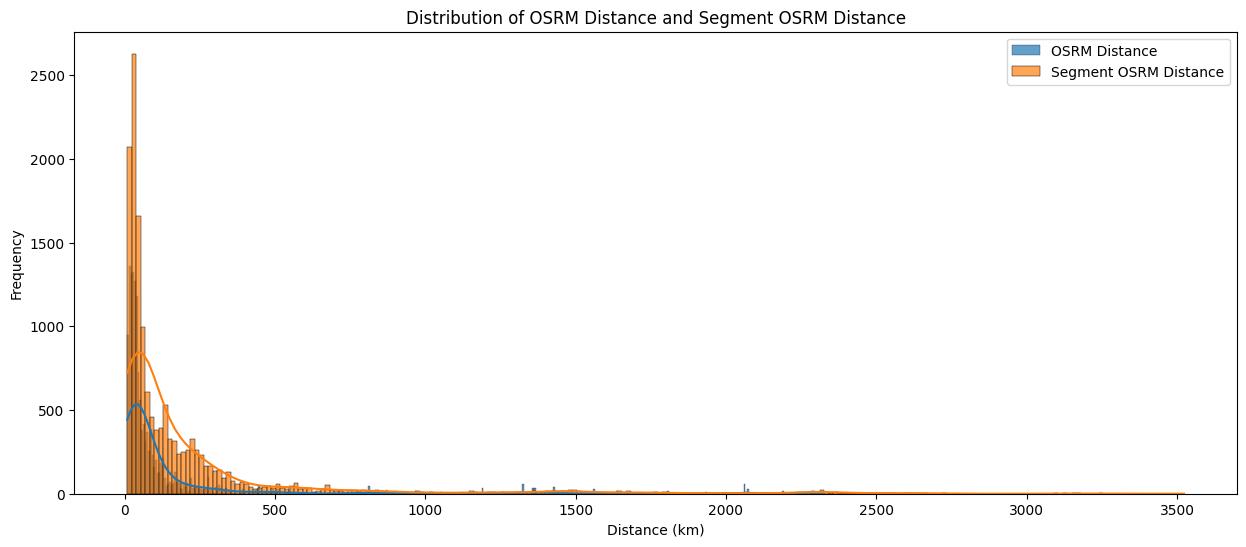

In [ ]:
# Distribution of OSRM Distance and Segment OSRM Distance
draw_histograms(agg_df_2['osrm_distance'], agg_df_2['segment_osrm_distance'], 'OSRM Distance', 'Segment OSRM Distance',
                'Distribution of OSRM Distance and Segment OSRM Distance', 'Distance (km)', 'Frequency')

Insights:
- Visual analysis also proves that there is no difference between osrm_distance and segment_osrm_distance.
- Using Statistical methods, we can test whether the conclusion is correct or not.

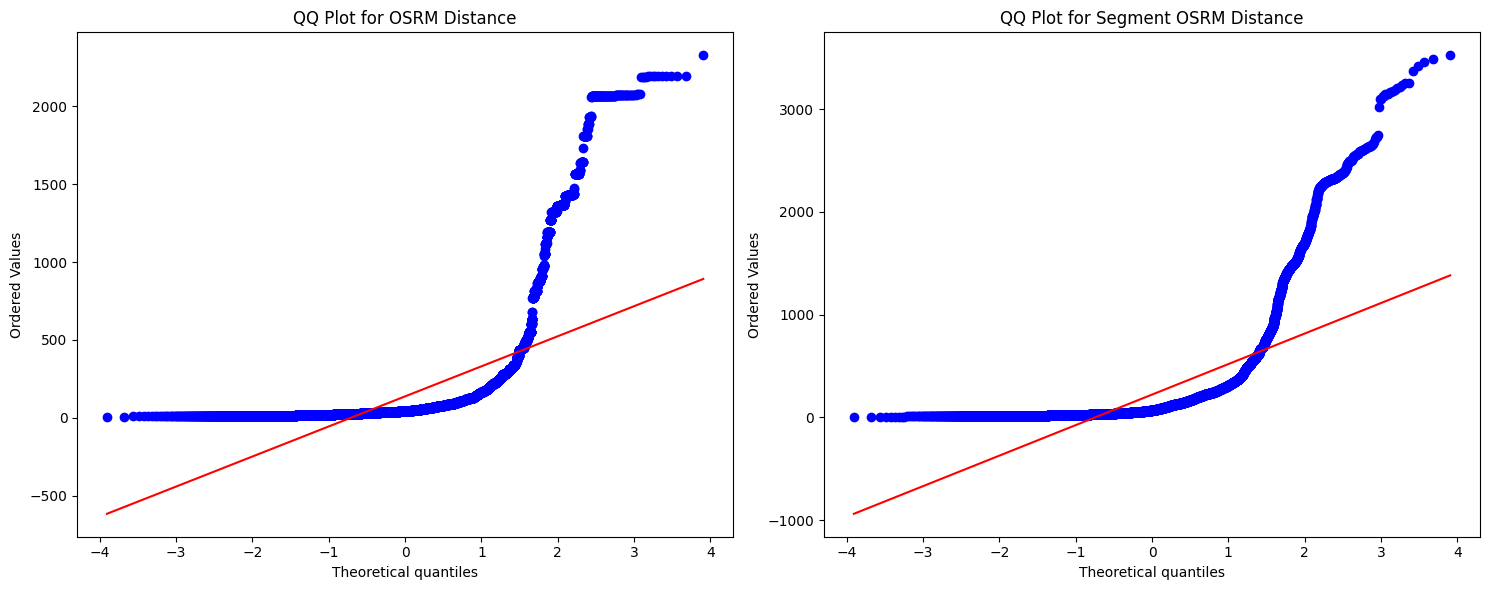

In [ ]:
# Draw QQ Plot for OSRM Distance and Segment OSRM Distance
draw_qq_plot(agg_df_2['osrm_distance'], agg_df_2['segment_osrm_distance'], 'QQ Plot for OSRM Distance', 'QQ Plot for Segment OSRM Distance')

Insights:
- From the graph, we can see that the both osrm_distance and segment_osrm_distance are not normally distributed.
- Will quantify the results using Shapiro-Wilk Test.

Shapiro-Wilk Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is normally distributed.
- Alternate Hypothesis: The data is not normally distributed.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['osrm_distance'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['segment_osrm_distance'])

Shapiro-Wilk Test for Normality
Statistics: 0.41228074588682406
p-value: 2.896753685020016e-112
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.5071258876719171
p-value: 1.1730299870400521e-107
The data is not normally distributed


In [ ]:
# Levene's Test for Homogeneity of Variance
levene_test(agg_df_2['osrm_distance'], agg_df_2['segment_osrm_distance'])

Levene's Test for Homogeneity of Variance
Statistics: 349.0792897665722
p-value: 1.879699723806504e-77
The variances are not equal


Insights:
- Based on the statistical analysis, the data is not normally distributed.
- The data does have equal variance.
- Hence, we can't do the two-sample t-test.

Trying to convert the data to normal distribution using log transformation.

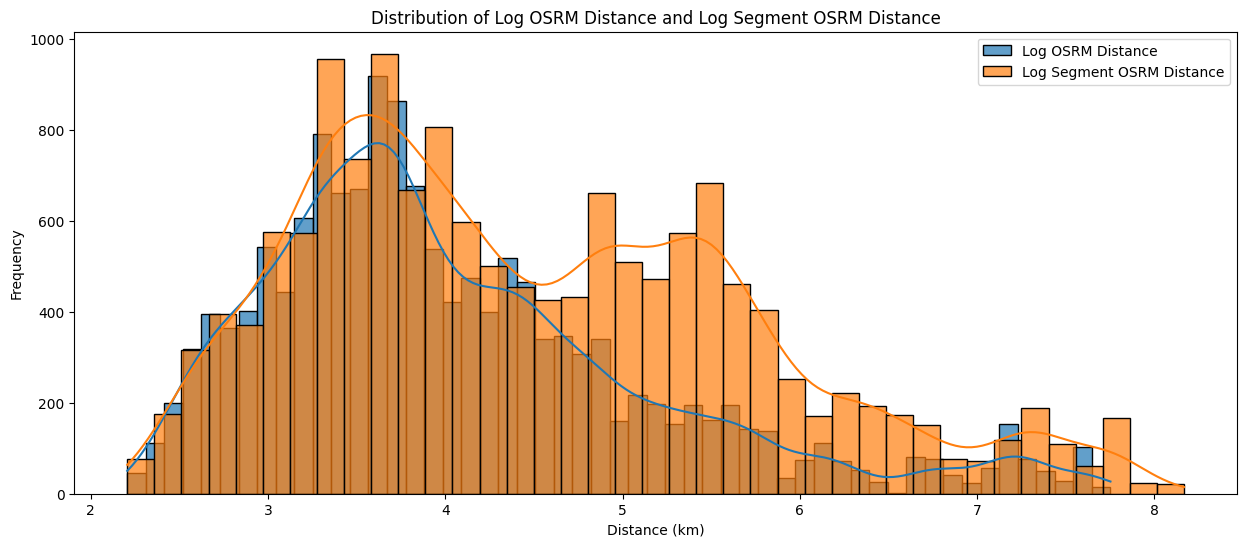

In [ ]:
# convert the osrm and segment osrm distance into log normal distribution
convert_to_log_normal_and_visualize(agg_df_2, 'osrm_distance', 'segment_osrm_distance', 'Log OSRM Distance', 'Log Segment OSRM Distance', 'Distribution of Log OSRM Distance and Log Segment OSRM Distance', 'Distance (km)', 'Frequency')

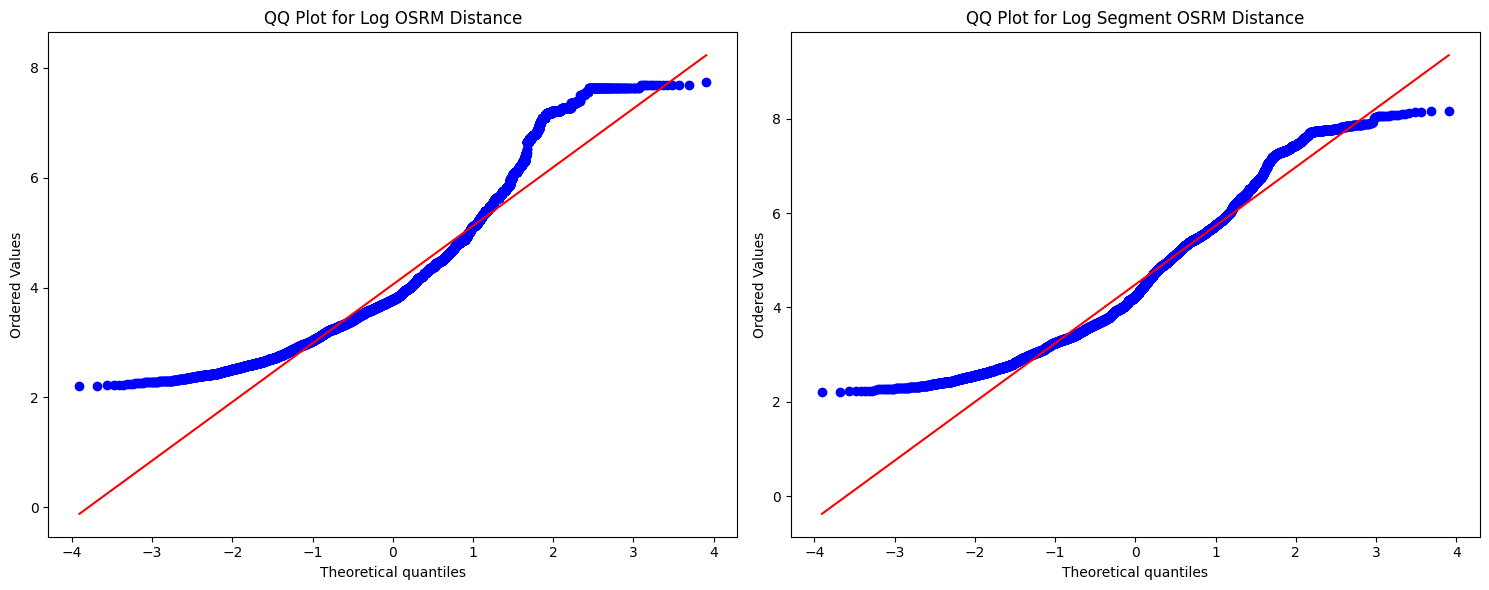

In [ ]:
# Draw QQ Plot for Log OSRM Distance and Log Segment OSRM Distance
draw_qq_plot(agg_df_2['log_osrm_distance'], agg_df_2['log_segment_osrm_distance'], 'QQ Plot for Log OSRM Distance', 'QQ Plot for Log Segment OSRM Distance')

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['log_osrm_distance'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['log_segment_osrm_distance'])

Shapiro-Wilk Test for Normality
Statistics: 0.9206203747961604
p-value: 1.2073211358372833e-65
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.9612578809307818
p-value: 4.986512109918107e-52
The data is not normally distributed


Insights:
- Even after log transformation, the data is not normally distributed.
- Hence, we can't do the two-sample t-test.
- Will go with Kolmogorov-Smirnov Test.

In [ ]:
# Drop the log transformed columns
agg_df_2.drop(['log_osrm_distance', 'log_segment_osrm_distance'], axis=1, inplace=True)

Kolmogorov-Smirnov Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is from the same distribution.
- Alternate Hypothesis: The data is not from the same distribution.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# 2 Sample KS Test for Non-Normal Distribution
ks_test(agg_df_2['osrm_distance'], agg_df_2['segment_osrm_distance'])

2 Sample KS Test for Non-Normal Distribution
Statistics: 0.18712382498140256
p-value: 3.883692296416939e-227
The distributions are different


Insights:
- Based on the statistical analysis, the data is from the same distribution.
- Hence, there is no difference between osrm_distance and segment_osrm_distance.

#### 5. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: There is no difference between osrm_time and segment_osrm_time.
- Alternate Hypothesis: There is a difference between osrm_time and segment_osrm_time.

Step 2: Identify the test
- Two Sample T-Test
    - To do the two-sample t-test, we need to check the assumptions:
        - Normality Test:
            - QQ Plot
            - Shapiro-Wilk Test
        - Homogeneity of Variance Test:
            - Levene Test
- Kolmogorov-Smirnov Test

Step 3: Decide the significance level
- Significance level is 0.05

Step 4: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
agg_df_2[['osrm_time', 'segment_osrm_time']].describe()

osrm_time  segment_osrm_time
count  14787.000000       14787.000000
mean     108.303645         180.511598
std      218.447496         314.679279
min        6.000000           6.000000
25%       24.000000          30.000000
50%       41.000000          65.000000
75%       82.000000         184.000000
max     1686.000000        2564.000000

Insights:
- Based on the statistical data, there is no difference between osrm_time and segment_osrm_time.
- Will do the visual analysis to check the difference between osrm_time and segment_osrm_time.

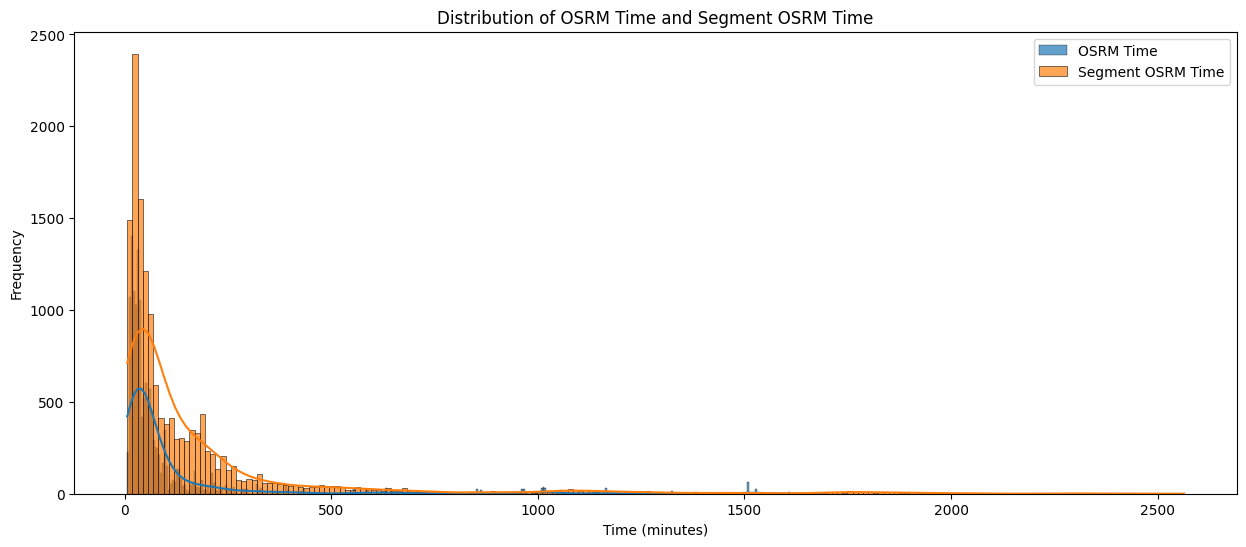

In [ ]:
# Distribution of OSRM Time and Segment OSRM Time
draw_histograms(agg_df_2['osrm_time'], agg_df_2['segment_osrm_time'], 'OSRM Time', 'Segment OSRM Time',
                'Distribution of OSRM Time and Segment OSRM Time', 'Time (minutes)', 'Frequency')

Insights:
- Visual analysis also proves that there is no difference between osrm_time and segment_osrm_time.
- Using Statistical methods, we can test whether the conclusion is correct or not.

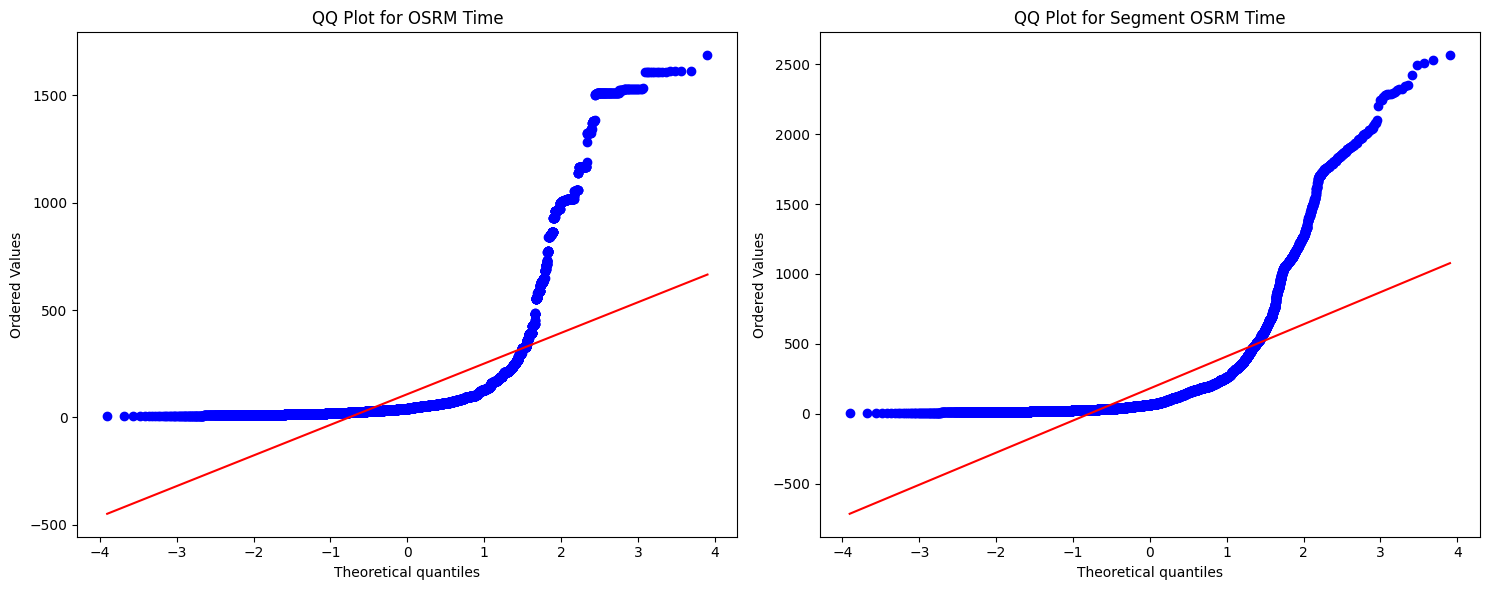

In [ ]:
# Draw QQ Plot for OSRM Time and Segment OSRM Time
draw_qq_plot(agg_df_2['osrm_time'], agg_df_2['segment_osrm_time'], 'QQ Plot for OSRM Time', 'QQ Plot for Segment OSRM Time')

Insights:
- From the graph, we can see that the both osrm_time and segment_osrm_time are not normally distributed.
- Will quantify the results using Shapiro-Wilk Test.

Shapiro-Wilk Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is normally distributed.
- Alternate Hypothesis: The data is not normally distributed.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['osrm_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['segment_osrm_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.4258338184867536
p-value: 1.1976397286640894e-111
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.5317562992725007
p-value: 2.4712371662349414e-106
The data is not normally distributed


In [ ]:
# Levene's Test for Homogeneity of Variance
levene_test(agg_df_2['osrm_time'], agg_df_2['segment_osrm_time'])

Levene's Test for Homogeneity of Variance
Statistics: 448.5894034544343
p-value: 7.939708063078011e-99
The variances are not equal


Insights:
- Based on the statistical analysis, the data is not normally distributed.
- The data does have equal variance.
- Hence, we can't do the two-sample t-test.

Trying to convert the data to normal distribution using log transformation.

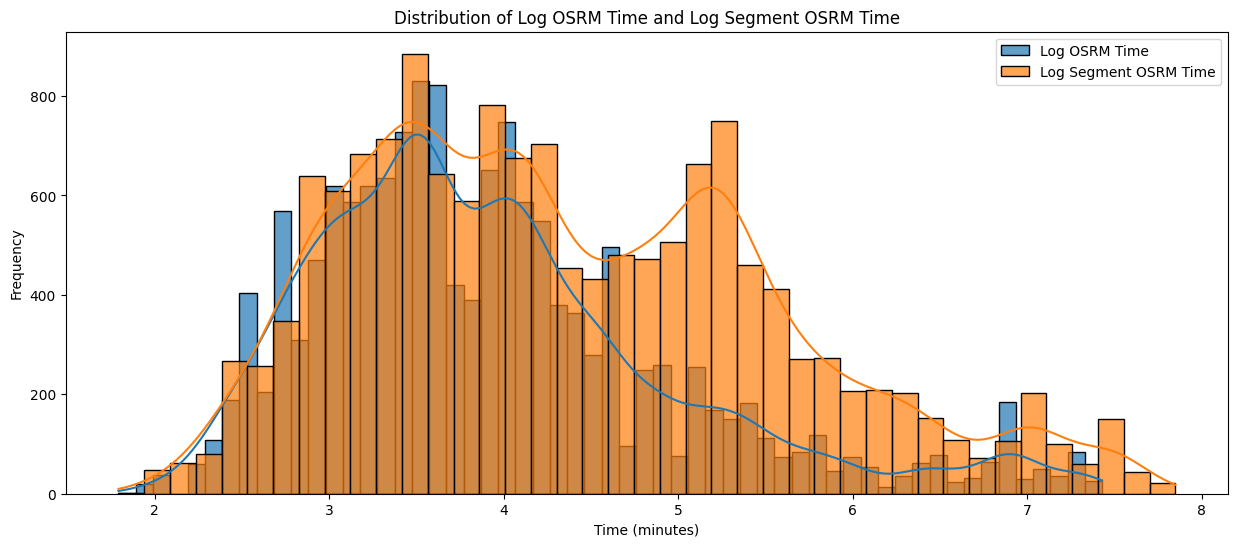

In [ ]:
# Convert the osrm and segment osrm time into log normal distribution
convert_to_log_normal_and_visualize(agg_df_2, 'osrm_time', 'segment_osrm_time', 'Log OSRM Time', 'Log Segment OSRM Time', 'Distribution of Log OSRM Time and Log Segment OSRM Time', 'Time (minutes)', 'Frequency')

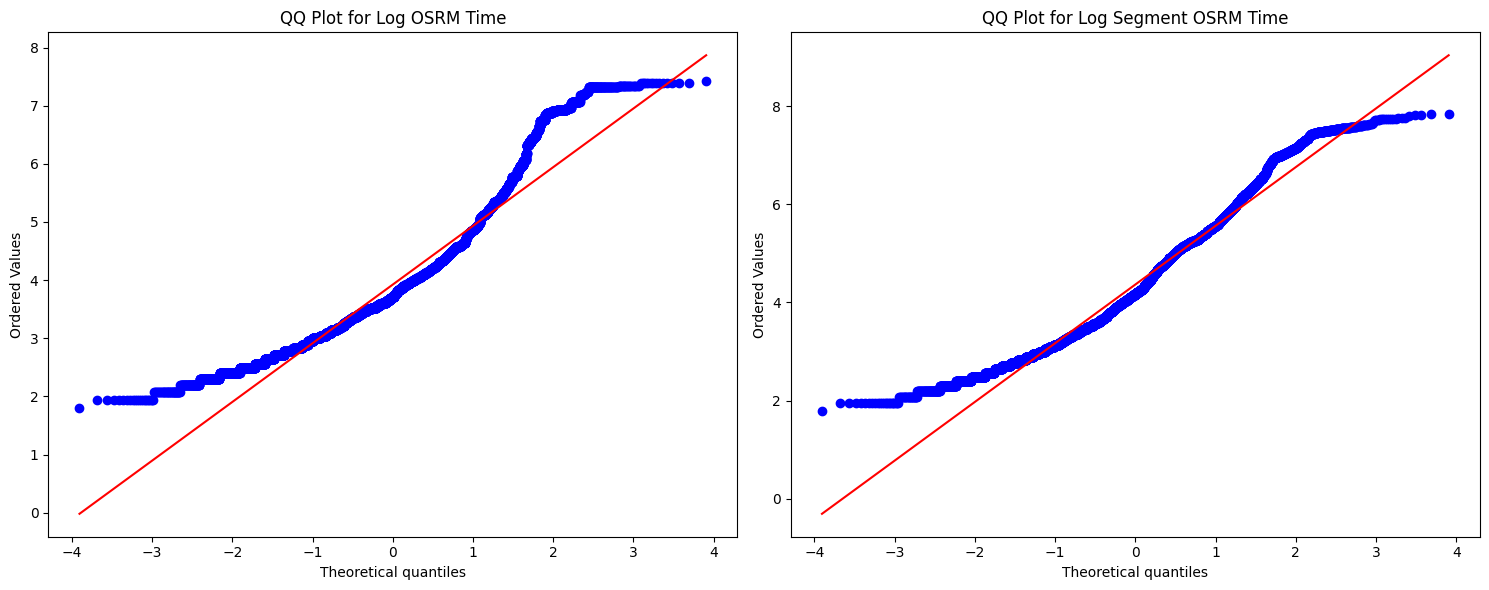

In [ ]:
# Draw QQ Plot for Log OSRM Time and Log Segment OSRM Time
draw_qq_plot(agg_df_2['log_osrm_time'], agg_df_2['log_segment_osrm_time'], 'QQ Plot for Log OSRM Time', 'QQ Plot for Log Segment OSRM Time')

In [ ]:
# Shapiro-Wilk Test for Normality
shapiro_wilk_test(agg_df_2['log_osrm_time'])
print('-' * 50)
shapiro_wilk_test(agg_df_2['log_segment_osrm_time'])

Shapiro-Wilk Test for Normality
Statistics: 0.9302214562901787
p-value: 4.4552379315422194e-63
The data is not normally distributed
--------------------------------------------------
Shapiro-Wilk Test for Normality
Statistics: 0.9697449114894365
p-value: 1.0331165567871736e-47
The data is not normally distributed


Insights:
- Even after log transformation, the data is not normally distributed.
- Hence, we can't do the two-sample t-test.
- Will go with Kolmogorov-Smirnov Test.

In [ ]:
# Drop the log transformed columns
agg_df_2.drop(['log_osrm_time', 'log_segment_osrm_time'], axis=1, inplace=True)

Kolmogorov-Smirnov Test:

Step 1: Define Null and Alternate Hypothesis
- Null Hypothesis: The data is from the same distribution.
- Alternate Hypothesis: The data is not from the same distribution.

Step 2: Decide the significance level
- Significance level is 0.05

Step 3: Calculate and Compare the p-value
- p-value < alpha: Reject the Null Hypothesis
- p-value > alpha: Fail to reject the Null Hypothesis

In [ ]:
# 2 Sample KS Test for Non-Normal Distribution
ks_test(agg_df_2['osrm_time'], agg_df_2['segment_osrm_time'])

2 Sample KS Test for Non-Normal Distribution
Statistics: 0.2068032731453303
p-value: 8.103581900075691e-278
The distributions are different


Insights:
- Based on the statistical analysis, the data is from the same distribution.
- Hence, there is no difference between osrm_time and segment_osrm_time.

#### 6. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [ ]:
num_cols = agg_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
agg_df[num_cols].describe().T

count        mean         std        min  \
start_scan_to_end_scan          26222.0  298.553390  441.116816  20.000000   
actual_distance_to_destination  26222.0   92.533054  209.952355   9.001351   
actual_time                     26222.0  200.926588  385.730908   9.000000   
osrm_time                       26222.0   90.785333  185.554359   6.000000   
osrm_distance                   26222.0  114.975332  254.426468   9.072900   
trip_time(mins)                 26222.0  299.107278  441.249287  20.702813   
trip_creation_day               26222.0   18.400351    7.892191   1.000000   
trip_creation_month             26222.0    9.120815    0.325918   9.000000   
trip_creation_week              26222.0   38.302952    0.965982  37.000000   
trip_creation_hour              26222.0   12.880749    8.270751   0.000000   

                                      25%         50%         75%          max  
start_scan_to_end_scan          90.000000  152.000000  307.000000  7898.000000  
actual_distance_to_destination  21.654149   35.044329   65.557393  1927.447705  
actual_time                     51.000000   84.000000  167.000000  4532.000000  
osrm_time                       25.000000   39.000000   72.000000  1686.000000  
osrm_distance                   27.719150   43.543550   85.443950  2326.199100  
trip_time(mins)                 90.977759  152.336732  307.285979  7898.551955  
trip_creation_day               14.000000   19.000000   25.000000    30.000000  
trip_creation_month              9.000000    9.000000    9.000000    10.000000  
trip_creation_week              38.000000   38.000000   39.000000    40.000000  
trip_creation_hour               4.000000   16.000000   21.000000    23.000000

Insights:
- For all the numerical columns, Mean is greater than the Median.
- This indicates that the data is right skewed and outliers are present in the data.

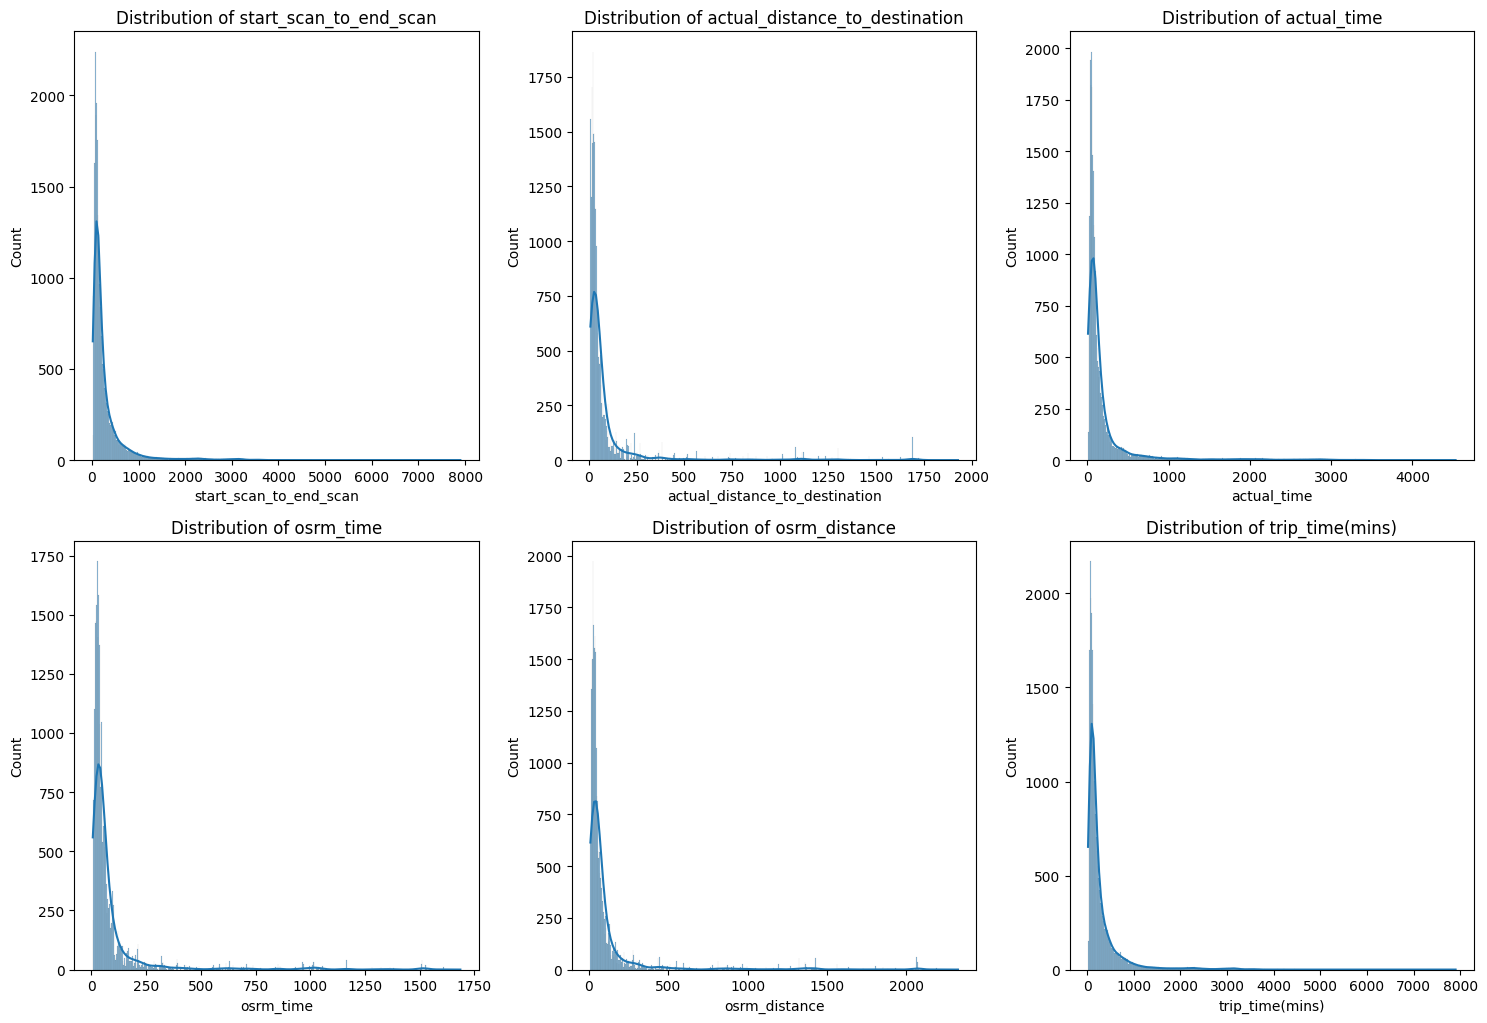

In [ ]:
# Get numerical columns
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'trip_time(mins)']

# Plotting the distribution of numerical columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(agg_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Insights:
- None of the numerical columns are normally distributed.
- The columns are right skewed which means the tail is on the right side of the distribution.
- This indicates that the mean is greater than the median and outliers are present in the data.
- The outlier can be treated on further analysis.

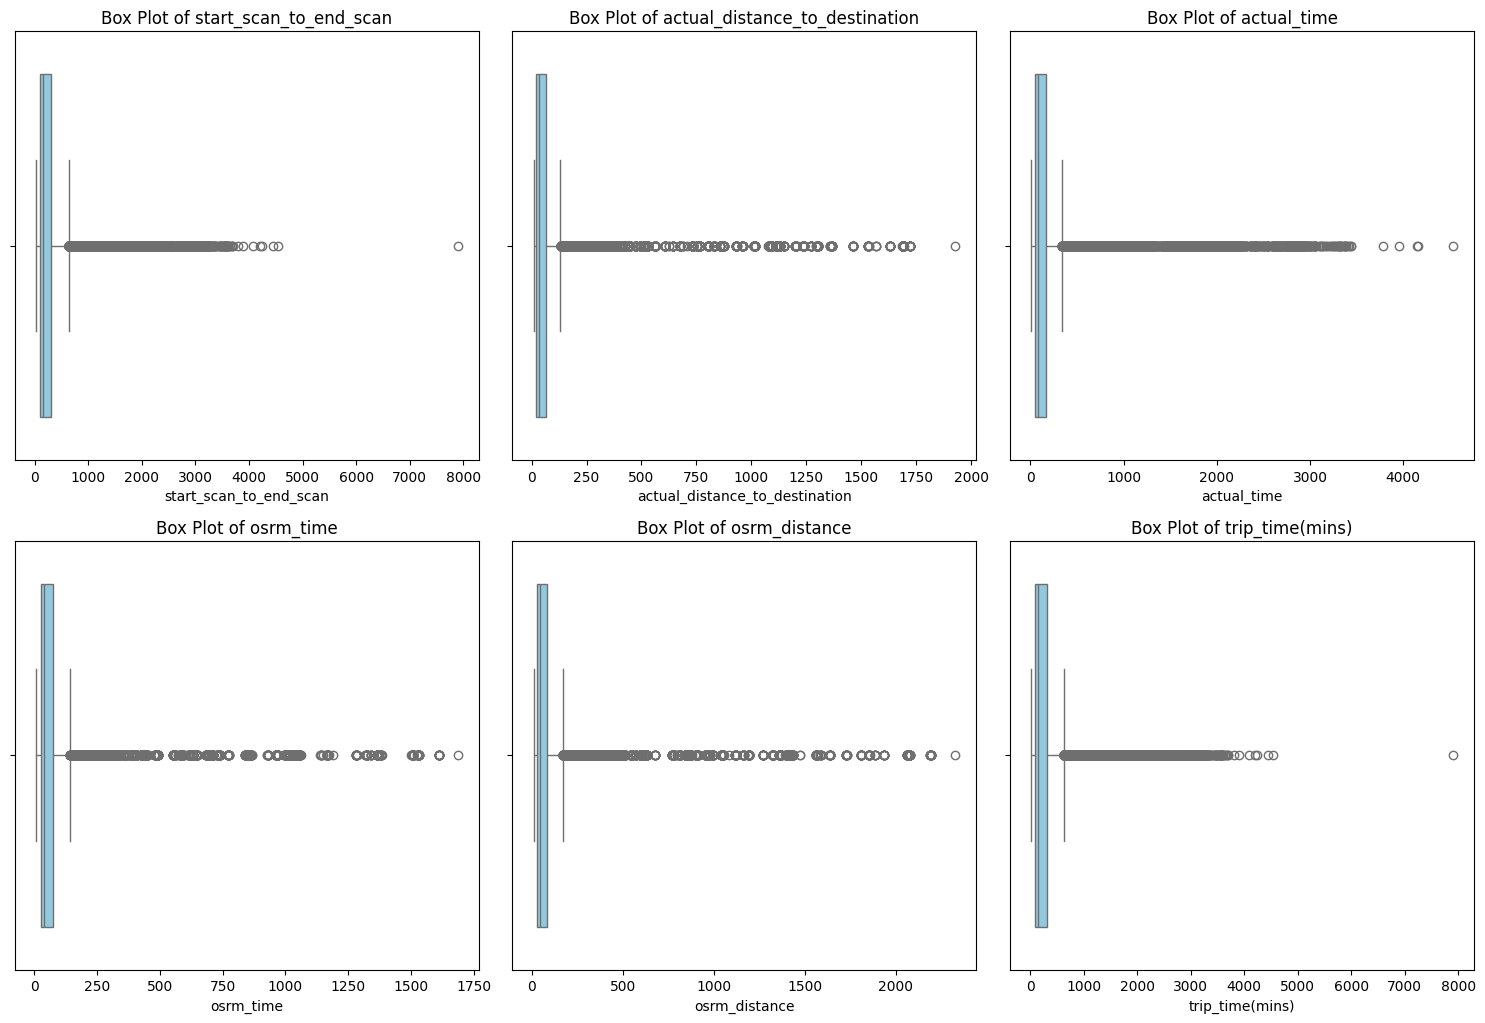

In [ ]:
# Box Plot of numerical columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=agg_df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Insights:
- Box Plot proves the insights from the histogram.
- The box plot shows the presence of outliers in the data.

#### 7. Handle the outliers using the IQR method.

In [ ]:
# Detecting Outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f'Column: {data.name}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'Number of Outliers: {outliers.shape[0]}')
    print('-' * 50)
    return outliers

In [ ]:

# Detecting Outliers using IQR
outliers_iqr = agg_df[num_cols].apply(detect_outliers_iqr)

Column: start_scan_to_end_scan
Q1: 90.0
Q3: 307.0
IQR: 217.0
Lower Bound: -235.5
Upper Bound: 632.5
Number of Outliers: 2710
--------------------------------------------------
Column: actual_distance_to_destination
Q1: 21.654149220710377
Q3: 65.55739330743673
IQR: 43.903244086726346
Lower Bound: -44.20071690937914
Upper Bound: 131.41225943752625
Number of Outliers: 3272
--------------------------------------------------
Column: actual_time
Q1: 51.0
Q3: 167.0
IQR: 116.0
Lower Bound: -123.0
Upper Bound: 341.0
Number of Outliers: 3158
--------------------------------------------------
Column: osrm_time
Q1: 25.0
Q3: 72.0
IQR: 47.0
Lower Bound: -45.5
Upper Bound: 142.5
Number of Outliers: 2906
--------------------------------------------------
Column: osrm_distance
Q1: 27.71915
Q3: 85.44395
IQR: 57.7248
Lower Bound: -58.86805
Upper Bound: 172.03115
Number of Outliers: 3079
--------------------------------------------------
Column: trip_time(mins)
Q1: 90.97775862916666
Q3: 307.28597948333334

Insights:
- Outliers in our sample data may be genuine.
- It's advisable to remove outliers only when there is a valid justification.
- Some outliers reflect natural variations within the population and should remain in the dataset.

#### 8. Do one-hot encoding of categorical variables (like route_type)

In [ ]:
# Previewing the categorical column - route_type
agg_df['route_type'].value_counts()

route_type
FTL        13798
Carting    12424
Name: count, dtype: int64

In [ ]:
# Performing One Hot Encoding for the column 'route_type'
label_encoder = LabelEncoder()
agg_df['route_type'] = label_encoder.fit_transform(agg_df['route_type'])

agg_df['route_type'].value_counts()

route_type
1    13798
0    12424
Name: count, dtype: int64

Insights:
- As we can see from the results, FTL and Carting were converted into 1 and 0 encoding.

In [ ]:
# Previewing the categorical column - data
agg_df['data'].value_counts()

data
training    18893
test         7329
Name: count, dtype: int64

In [ ]:
# Performing One Hot Encoding for the column 'data'
agg_df['data'] = label_encoder.fit_transform(agg_df['data'])

agg_df['data'].value_counts()

data
1    18893
0     7329
Name: count, dtype: int64

Insights:
- As we can see from the results, training and test data were converted into 1 and 0 encoding.

#### 9. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

##### Normalization

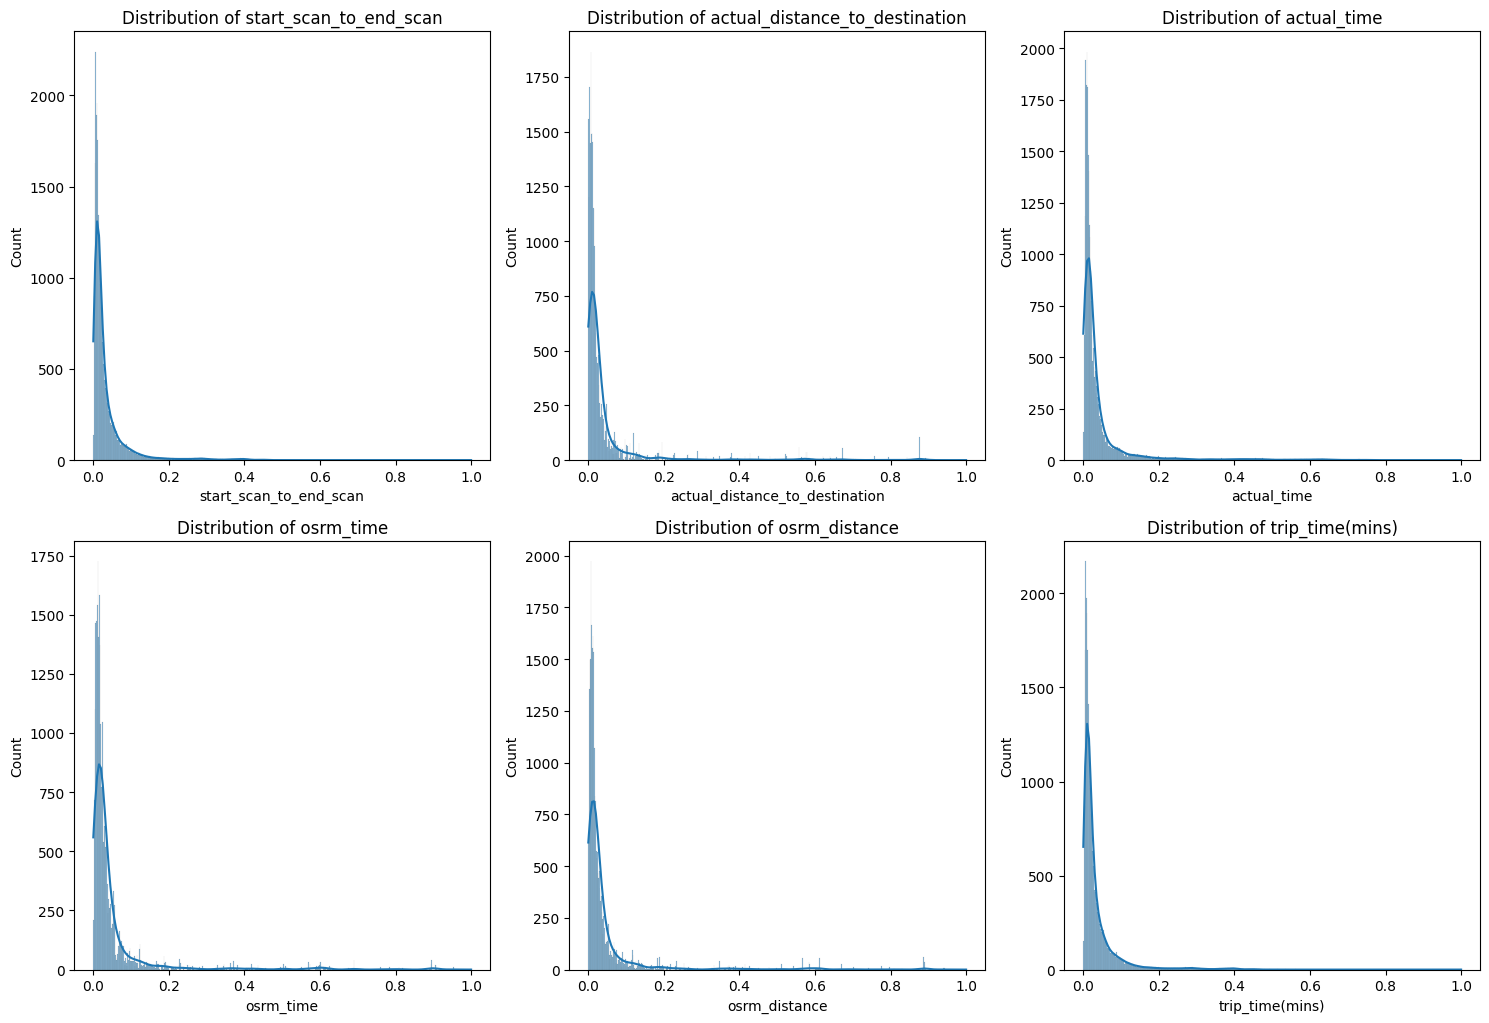

In [ ]:
# Performing Min-Max Scaler
back_up_df = agg_df.copy()
scaler = MinMaxScaler()
back_up_df[num_cols] = scaler.fit_transform(back_up_df[num_cols])

# Histogram of numerical columns after scaling
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(back_up_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Insights:
- As we can see from the results, the numerical columns were normalized using MinMaxScaler.
- All the numerical columns were scaled between 0 and 1.

##### Standardization

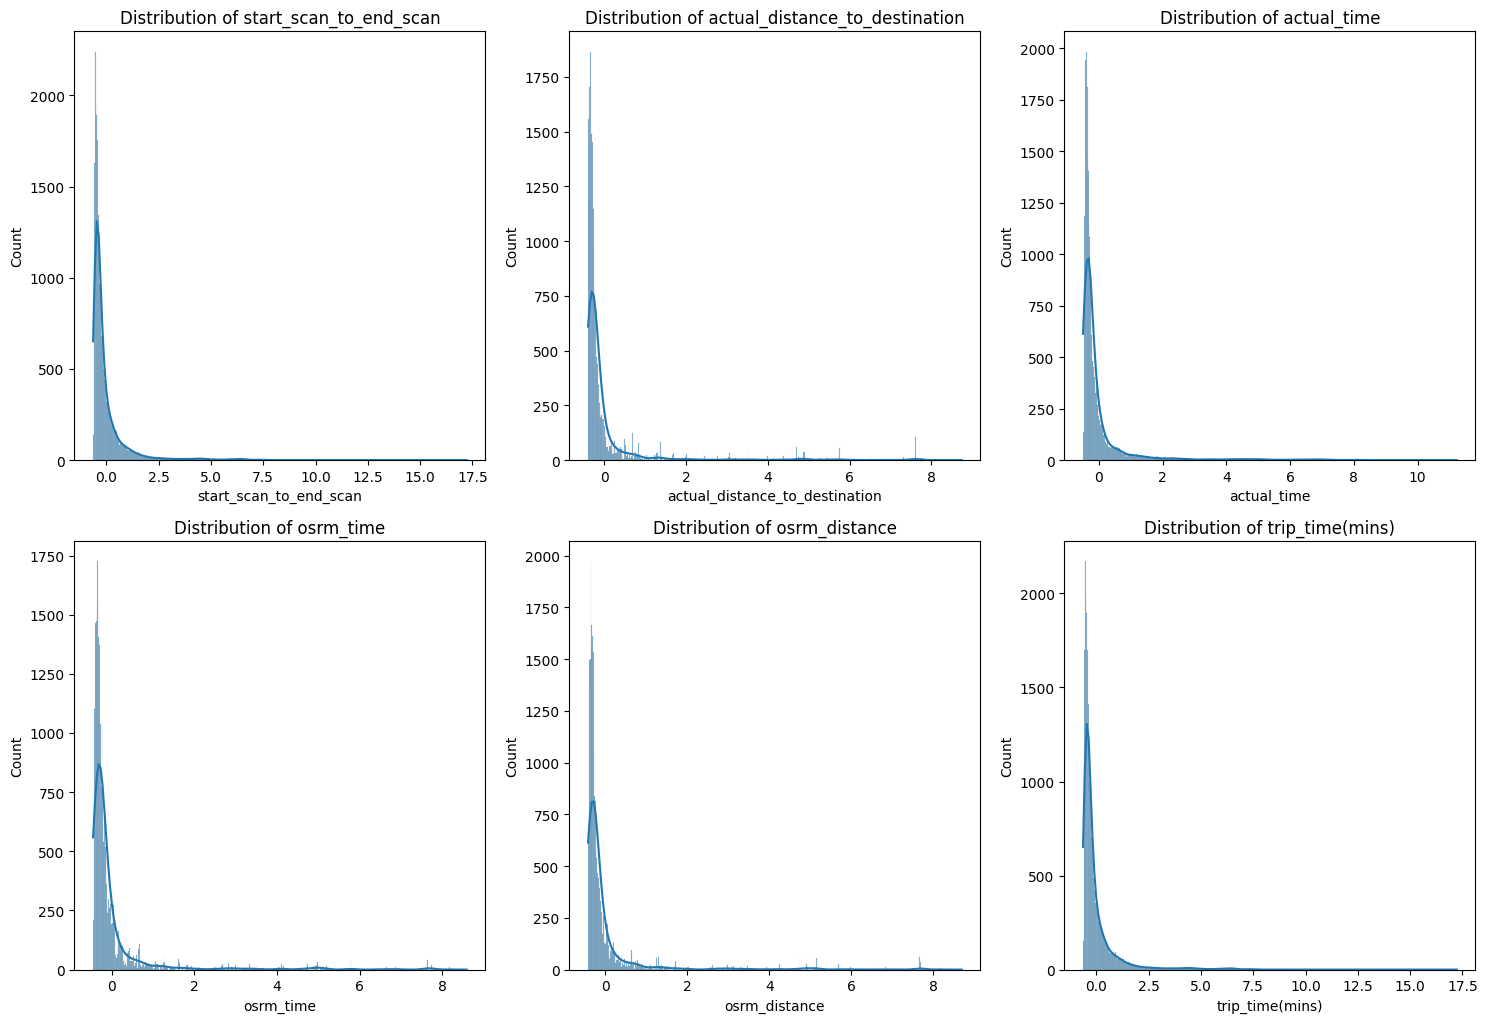

In [ ]:
# Perform Standardization
back_up_df = agg_df.copy()
scaler = StandardScaler()
back_up_df[num_cols] = scaler.fit_transform(back_up_df[num_cols])

# Histogram of numerical columns after standardization
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(back_up_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
back_up_df.describe().T

count                           mean  \
data                            26222.0                       0.720502   
route_type                      26222.0                       0.526199   
start_scan_to_end_scan          26222.0                           -0.0   
actual_distance_to_destination  26222.0                           -0.0   
actual_time                     26222.0                           -0.0   
osrm_time                       26222.0                            0.0   
osrm_distance                   26222.0                            0.0   
trip_time(mins)                 26222.0                            0.0   
trip_creation_date                26222  2018-09-22 00:35:41.713065216   
trip_creation_day               26222.0                      18.400351   
trip_creation_month             26222.0                       9.120815   
trip_creation_week              26222.0                      38.302952   
trip_creation_hour              26222.0                      12.880749   

                                                min                  25%  \
data                                            0.0                  0.0   
route_type                                      0.0                  0.0   
start_scan_to_end_scan                    -0.631485            -0.472794   
actual_distance_to_destination            -0.397868            -0.337602   
actual_time                               -0.497575            -0.388689   
osrm_time                                 -0.456939            -0.354541   
osrm_distance                             -0.416248            -0.342959   
trip_time(mins)                           -0.630958            -0.471691   
trip_creation_date              2018-09-12 00:00:00  2018-09-17 00:00:00   
trip_creation_day                               1.0                 14.0   
trip_creation_month                             9.0                  9.0   
trip_creation_week                             37.0                 38.0   
trip_creation_hour                              0.0                  4.0   

                                                50%                  75%  \
data                                            1.0                  1.0   
route_type                                      1.0                  1.0   
start_scan_to_end_scan                    -0.332239             0.019149   
actual_distance_to_destination            -0.273823            -0.128487   
actual_time                               -0.303136            -0.087956   
osrm_time                                  -0.27909            -0.101241   
osrm_distance                             -0.280761            -0.116073   
trip_time(mins)                           -0.332631             0.018536   
trip_creation_date              2018-09-22 00:00:00  2018-09-27 00:00:00   
trip_creation_day                              19.0                 25.0   
trip_creation_month                             9.0                  9.0   
trip_creation_week                             38.0                 39.0   
trip_creation_hour                             16.0                 21.0   

                                                max       std  
data                                            1.0  0.448761  
route_type                                      1.0  0.499323  
start_scan_to_end_scan                     17.22807  1.000019  
actual_distance_to_destination             8.739838  1.000019  
actual_time                               11.228439  1.000019  
osrm_time                                  8.597185  1.000019  
osrm_distance                              8.691179  1.000019  
trip_time(mins)                           17.222894  1.000019  
trip_creation_date              2018-10-03 00:00:00       NaN  
trip_creation_day                              30.0  7.892191  
trip_creation_month                            10.0  0.325918  
trip_creation_week                             40.0  0.965982  
trip_creation_hour                 

Insights:
- As we can see from the results, the numerical columns were standardized using StandardScaler.
- All the numerical columns were scaled with mean 0 and standard deviation 1.

Business Insights:
------------------
- Timeframe: Data spans from '2018-09-12' to '2018-10-08'.
- Unique Entries:
    - 14787 unique trip IDs
    - 31 unique source states, 32 unique destination states
    - 1240 unique source cities, 1238 unique destination cities
- Data Split: Majority of data is for testing, not training.
- Common Route Type: Full Truck Load (FTL)  is the most frequent transportation type.
- Missing Data: 10 unique source names are missing and 13 unique destination names are missing.
- Trip Patterns:
    - Trip volume peaks at 10 P.M., with increasing activity post-noon.
    - Week 38 sees the highest number of trips.
- Ordering Patterns:
    - Most orders are placed mid-month.
    - Key source states: Maharashtra, Karnataka, Tamil Nadu, Haryana, UP.
    - Key source cities: Bengaluru, Gurgaon, Bhiwandi, Mumbai, Chennai.
    - Key destination states: Karnataka, Maharashtra, Tamil Nadu, Haryana, Uttar Pradesh.
    - Key destination cities: Bengaluru, Mumbai, Gurgaon, Chennai, Hydrabad.
- Statistical Insights:
    - Similarity in time features: start_scan_to_end_scan and od_total_time; start_scan_to_end_scan and segment_actual_time.
    - Dissimilarity between actual_time & osrm_time, osrm_distance & segment_osrm_distance.
    - Both osrm_time and segment_osrm_time show significant differences.

Recommendations:
----------------

- Improve OSRM System: The OSRM trip planning system needs optimization. The discrepancies between the osrm_time and actual_time should be addressed to enhance delivery time accuracy and provide customers with more precise delivery expectations.

- Reduce Time Discrepancies: The difference between osrm_time and actual_time suggests inefficiencies. Reducing this gap will lead to better delivery time predictions and improve customer satisfaction.

- Address Distance Mismatch: The variation between the osrm_distance and the actual distance covered may indicate delivery personnel not following the predefined route or inaccuracies in OSRM route predictions. This could cause delays, so the team should investigate routing issues considering traffic, terrain, and other factors.

- Enhance Key Corridors: Most orders originate from or are destined for states like Maharashtra, Karnataka, Haryana, and Tamil Nadu. Strengthening existing logistics corridors in these regions can further improve delivery efficiency.

- Customer Profiling: Profiling customers in the states of Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh can help understand why most orders come from these areas and enhance the overall buying and delivery experience.

- Plan for Peak Seasons: Heavy traffic or challenging terrain in certain states could impact deliveries during peak festival seasons, requiring better planning to meet demand.